# Asset Portfolio Management using Deep Reinforcement Learning
---

## 1.0 Load and Install Relevant Libraries and Packages
----

* We install the relevant Libraries using the FinRL Library
* We further check that all the required Libraries are installed and if not we use !pip install to install them

In [ ]:
!pip install finrl

     |████████████████████████████████| 82 kB 546 kB/s 
     |████████████████████████████████| 1.8 MB 12.0 MB/s 
     |████████████████████████████████| 54.7 MB 30 kB/s 
     |████████████████████████████████| 153 kB 48.3 MB/s 
     |████████████████████████████████| 108 kB 53.9 MB/s 
     |████████████████████████████████| 2.1 MB 48.4 MB/s 
     |████████████████████████████████| 124 kB 63.8 MB/s 
     |████████████████████████████████| 174 kB 43.0 MB/s 
     |████████████████████████████████| 91 kB 8.4 MB/s 
     |████████████████████████████████| 103 kB 56.3 MB/s 
     |████████████████████████████████| 1.3 MB 46.6 MB/s 
     |████████████████████████████████| 636 kB 48.4 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 
     |████████████████████████████████| 271 kB 46.6 MB/s 
     |████████████████████████████████| 160 kB 56.3 MB/s 
     |████████████████████████████████| 3.5 MB 47.2 MB/s 
     |████████████████████████████████| 2.1 MB 38.2 MB/s 
     |███████████████

### 1.1 Install Packages through FinRL Library      

In [ ]:
## install finrl library if not installed

import pkg_resources
import pip
installedPackages = {pkg.key for pkg in pkg_resources.working_set} # list of installed packages

if 'finrl' not in installedPackages:
    !pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git #clone the FinRL library to install required packages

  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-e969nrk0
  Running command git clone -q https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-e969nrk0
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-g724cgnb/pyfolio_3282ebe2afc8425dab46ada4ce95dd93
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-g724cgnb/pyfolio_3282ebe2afc8425dab46ada4ce95dd93
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-g724cgnb/elegantrl_b4374178419d40b3bdf4c0c3721e0e48
  Running command git clone -q https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-g724cgnb/elegantrl_b4374178419d40b3bdf4c0c3721e0e48
     |████████████████████████████████| 73 kB 1.5 MB/s 
     |████████████████████████████████| 191 kB 9.0 MB/s 
     |████████████████████████████████| 89.3 MB 21 kB/s 
     |████████████████████████████████| 448 kB 43.3 MB/s 
     |████████

----
### 1.2. Check if the additional Required packages are present. If not, install them

* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio
* ta
* PyPortfolioOpt

In [ ]:
required = {'yfinance', 'pandas','numpy', 'matplotlib', 'stockstats','stable-baselines',
            'gym','tensorflow','pyfolio', 'ta', 'PyPortfolioOpt'}
missing = required - installedPackages
if missing:
    !pip install yfinance
    !pip install pandas
    !pip install numpy
    !pip install matplotlib
    !pip install stockstats
    !pip install gym
    !pip install stable-baselines3[extra]
    !pip install tensorflow
    !pip install git+https://github.com/quantopian/pyfolio
    !pip install ta
    !pip install PyPortfolioOpt

  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-2tgec1j1
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-2tgec1j1
  Created wheel for ta: filename=ta-0.7.0-py3-none-any.whl size=28718 sha256=11d74235fea580aaba60da502f9dab78eaff37c5305411b79a458a4eb5e06f12
  Stored in directory: /root/.cache/pip/wheels/5e/74/e0/72395003bd1d3c8f3f5860c2d180ff15699e47a2733d8ebd38
Successfully built ta
     |████████████████████████████████| 61 kB 2.9 MB/s 
     |████████████████████████████████| 2.8 MB 7.3 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


# Asset Portfolio Management using Deep Reinforcement Learning
----

## 2.0 Download the Data for the Analysis
---
* Data is Downloaded from Yahoo Finance using an API in the FinRL Library
* The 30 Dow Jones Industrial Average tickers for the period from 2009 to 2020 are used
* The data is downloaded and the cleaned data are saved in csv files for use

---


### 2.1 Import Relevant Packages

In [ ]:
import pandas as pd
import numpy as np
#from config import config
import matplotlib.pylab as plt

import yfinance as yf
from pandas_datareader import data as pdr

%matplotlib inline

In [ ]:
import pathlib

# import finrl

import pandas as pd
import datetime
import os

  # pd.options.display.max_rows = 10
  # pd.options.display.max_columns = 10
class config:

  # PACKAGE_ROOT = pathlib.Path(finrl.__file__).resolve().parent
  # PACKAGE_ROOT = pathlib.Path().resolve().parent

  # TRAINED_MODEL_DIR = PACKAGE_ROOT / "trained_models"
  # DATASET_DIR = PACKAGE_ROOT / "data"

  # data
  TRAINING_DATA_FILE = "data/ETF_SPY_2009_2020.csv"
  TURBULENCE_DATA = "data/dow30_turbulence_index.csv"
  TESTING_DATA_FILE = "test.csv"

  # now = datetime.datetime.now()
  # TRAINED_MODEL_DIR = f"trained_models/{now}"
  DATA_SAVE_DIR = f"datasets"
  TRAINED_MODEL_DIR = f"trained_models"
  TENSORBOARD_LOG_DIR = f"tensorboard_log"
  RESULTS_DIR = f"results"
  # os.makedirs(TRAINED_MODEL_DIR)


  ## time_fmt = '%Y-%m-%d'
  START_DATE = "2009-01-01"
  END_DATE = "2020-12-01"

  START_TRADE_DATE = "2019-01-01"

  ## dataset default columns
  DEFAULT_DATA_COLUMNS = ["date", "tic", "close"]

  ## stockstats technical indicator column names
  ## check https://pypi.org/project/stockstats/ for different names
  TECHNICAL_INDICATORS_LIST = ["macd", "rsi_30", "cci_30", "dx_30"]


  ## Model Parameters
  A2C_PARAMS = {"n_steps": 5, "ent_coef": 0.01, "learning_rate": 0.0007}
  PPO_PARAMS = {
      "n_steps": 2048,
      "ent_coef": 0.01,
      "learning_rate": 0.00025,
      "batch_size": 64,
  }
  DDPG_PARAMS = {"batch_size": 128, "buffer_size": 50000, "learning_rate": 0.001}
  TD3_PARAMS = {"batch_size": 100, "buffer_size": 1000000, "learning_rate": 0.001}
  SAC_PARAMS = {
      "batch_size": 64,
      "buffer_size": 100000,
      "learning_rate": 0.0001,
      "learning_starts": 100,
      "batch_size": 64,
      "ent_coef": "auto_0.1",
  }

  ########################################################
  ############## Stock Ticker Setup starts ##############
  SINGLE_TICKER = ["AAPL"]

  # self defined
  MULTIPLE_STOCK_TICKER = ["AAPL", "MSFT", "FB"]

  # check https://wrds-www.wharton.upenn.edu/ for U.S. index constituents
  # Dow 30 constituents at 2019/01
  DOW_30_TICKER = [
      "AAPL",
      "MSFT",
      "JPM",
      "V",
      "RTX",
      "PG",
      "GS",
      "NKE",
      "DIS",
      "AXP",
      "HD",
      "INTC",
      "WMT",
      "IBM",
      "MRK",
      "UNH",
      "KO",
      "CAT",
      "TRV",
      "JNJ",
      "CVX",
      "MCD",
      "VZ",
      "CSCO",
      "XOM",
      "BA",
      "MMM",
      "PFE",
      "WBA",
      "DD",
  ]

  # Nasdaq 100 constituents at 2019/01
  NAS_100_TICKER = [
      "AMGN",
      "AAPL",
      "AMAT",
      "INTC",
      "PCAR",
      "PAYX",
      "MSFT",
      "ADBE",
      "CSCO",
      "XLNX",
      "QCOM",
      "COST",
      "SBUX",
      "FISV",
      "CTXS",
      "INTU",
      "AMZN",
      "EBAY",
      "BIIB",
      "CHKP",
      "GILD",
      "NLOK",
      "CMCSA",
      "FAST",
      "ADSK",
      "CTSH",
      "NVDA",
      "GOOGL",
      "ISRG",
      "VRTX",
      "HSIC",
      "BIDU",
      "ATVI",
      "ADP",
      "ROST",
      "ORLY",
      "CERN",
      "BKNG",
      "MYL",
      "MU",
      "DLTR",
      "ALXN",
      "SIRI",
      "MNST",
      "AVGO",
      "TXN",
      "MDLZ",
      "FB",
      "ADI",
      "WDC",
      "REGN",
      "LBTYK",
      "VRSK",
      "NFLX",
      "TSLA",
      "CHTR",
      "MAR",
      "ILMN",
      "LRCX",
      "EA",
      "AAL",
      "WBA",
      "KHC",
      "BMRN",
      "JD",
      "SWKS",
      "INCY",
      "PYPL",
      "CDW",
      "FOXA",
      "MXIM",
      "TMUS",
      "EXPE",
      "TCOM",
      "ULTA",
      "CSX",
      "NTES",
      "MCHP",
      "CTAS",
      "KLAC",
      "HAS",
      "JBHT",
      "IDXX",
      "WYNN",
      "MELI",
      "ALGN",
      "CDNS",
      "WDAY",
      "SNPS",
      "ASML",
      "TTWO",
      "PEP",
      "NXPI",
      "XEL",
      "AMD",
      "NTAP",
      "VRSN",
      "LULU",
      "WLTW",
      "UAL",
  ]

  # SP 500 constituents at 2019
  SP_500_TICKER = [
      "A",
      "AAL",
      "AAP",
      "AAPL",
      "ABBV",
      "ABC",
      "ABMD",
      "ABT",
      "ACN",
      "ADBE",
      "ADI",
      "ADM",
      "ADP",
      "ADS",
      "ADSK",
      "AEE",
      "AEP",
      "AES",
      "AFL",
      "AGN",
      "AIG",
      "AIV",
      "AIZ",
      "AJG",
      "AKAM",
      "ALB",
      "ALGN",
      "ALK",
      "ALL",
      "ALLE",
      "ALXN",
      "AMAT",
      "AMCR",
      "AMD",
      "AME",
      "AMG",
      "AMGN",
      "AMP",
      "AMT",
      "AMZN",
      "ANET",
      "ANSS",
      "ANTM",
      "AON",
      "AOS",
      "APA",
      "APD",
      "APH",
      "APTV",
      "ARE",
      "ARNC",
      "ATO",
      "ATVI",
      "AVB",
      "AVGO",
      "AVY",
      "AWK",
      "AXP",
      "AZO",
      "BA",
      "BAC",
      "BAX",
      "BBT",
      "BBY",
      "BDX",
      "BEN",
      "BF.B",
      "BHGE",
      "BIIB",
      "BK",
      "BKNG",
      "BLK",
      "BLL",
      "BMY",
      "BR",
      "BRK.B",
      "BSX",
      "BWA",
      "BXP",
      "C",
      "CAG",
      "CAH",
      "CAT",
      "CB",
      "CBOE",
      "CBRE",
      "CBS",
      "CCI",
      "CCL",
      "CDNS",
      "CE",
      "CELG",
      "CERN",
      "CF",
      "CFG",
      "CHD",
      "CHRW",
      "CHTR",
      "CI",
      "CINF",
      "CL",
      "CLX",
      "CMA",
      "CMCSA",
      "CME",
      "CMG",
      "CMI",
      "CMS",
      "CNC",
      "CNP",
      "COF",
      "COG",
      "COO",
      "COP",
      "COST",
      "COTY",
      "CPB",
      "CPRI",
      "CPRT",
      "CRM",
      "CSCO",
      "CSX",
      "CTAS",
      "CTL",
      "CTSH",
      "CTVA",
      "CTXS",
      "CVS",
      "CVX",
      "CXO",
      "D",
      "DAL",
      "DD",
      "DE",
      "DFS",
      "DG",
      "DGX",
      "DHI",
      "DHR",
      "DIS",
      "DISCK",
      "DISH",
      "DLR",
      "DLTR",
      "DOV",
      "DOW",
      "DRE",
      "DRI",
      "DTE",
      "DUK",
      "DVA",
      "DVN",
      "DXC",
      "EA",
      "EBAY",
      "ECL",
      "ED",
      "EFX",
      "EIX",
      "EL",
      "EMN",
      "EMR",
      "EOG",
      "EQIX",
      "EQR",
      "ES",
      "ESS",
      "ETFC",
      "ETN",
      "ETR",
      "EVRG",
      "EW",
      "EXC",
      "EXPD",
      "EXPE",
      "EXR",
      "F",
      "FANG",
      "FAST",
      "FB",
      "FBHS",
      "FCX",
      "FDX",
      "FE",
      "FFIV",
      "FIS",
      "FISV",
      "FITB",
      "FLIR",
      "FLS",
      "FLT",
      "FMC",
      "FOXA",
      "FRC",
      "FRT",
      "FTI",
      "FTNT",
      "FTV",
      "GD",
      "GE",
      "GILD",
      "GIS",
      "GL",
      "GLW",
      "GM",
      "GOOG",
      "GPC",
      "GPN",
      "GPS",
      "GRMN",
      "GS",
      "GWW",
      "HAL",
      "HAS",
      "HBAN",
      "HBI",
      "HCA",
      "HCP",
      "HD",
      "HES",
      "HFC",
      "HIG",
      "HII",
      "HLT",
      "HOG",
      "HOLX",
      "HON",
      "HP",
      "HPE",
      "HPQ",
      "HRB",
      "HRL",
      "HSIC",
      "HST",
      "HSY",
      "HUM",
      "IBM",
      "ICE",
      "IDXX",
      "IEX",
      "IFF",
      "ILMN",
      "INCY",
      "INFO",
      "INTC",
      "INTU",
      "IP",
      "IPG",
      "IPGP",
      "IQV",
      "IR",
      "IRM",
      "ISRG",
      "IT",
      "ITW",
      "IVZ",
      "JBHT",
      "JCI",
      "JEC",
      "JEF",
      "JKHY",
      "JNJ",
      "JNPR",
      "JPM",
      "JWN",
      "K",
      "KEY",
      "KEYS",
      "KHC",
      "KIM",
      "KLAC",
      "KMB",
      "KMI",
      "KMX",
      "KO",
      "KR",
      "KSS",
      "KSU",
      "L",
      "LB",
      "LDOS",
      "LEG",
      "LEN",
      "LH",
      "LHX",
      "LIN",
      "LKQ",
      "LLY",
      "LMT",
      "LNC",
      "LNT",
      "LOW",
      "LRCX",
      "LUV",
      "LW",
      "LYB",
      "M",
      "MA",
      "MAA",
      "MAC",
      "MAR",
      "MAS",
      "MCD",
      "MCHP",
      "MCK",
      "MCO",
      "MDLZ",
      "MDT",
      "MET",
      "MGM",
      "MHK",
      "MKC",
      "MKTX",
      "MLM",
      "MMC",
      "MMM",
      "MNST",
      "MO",
      "MOS",
      "MPC",
      "MRK",
      "MRO",
      "MS",
      "MSCI",
      "MSFT",
      "MSI",
      "MTB",
      "MTD",
      "MU",
      "MXIM",
      "MYL",
      "NBL",
      "NCLH",
      "NDAQ",
      "NEE",
      "NEM",
      "NFLX",
      "NI",
      "NKE",
      "NKTR",
      "NLSN",
      "NOC",
      "NOV",
      "NRG",
      "NSC",
      "NTAP",
      "NTRS",
      "NUE",
      "NVDA",
      "NWL",
      "NWS",
      "O",
      "OI",
      "OKE",
      "OMC",
      "ORCL",
      "ORLY",
      "OXY",
      "PAYX",
      "PBCT",
      "PCAR",
      "PEG",
      "PEP",
      "PFE",
      "PFG",
      "PG",
      "PGR",
      "PH",
      "PHM",
      "PKG",
      "PKI",
      "PLD",
      "PM",
      "PNC",
      "PNR",
      "PNW",
      "PPG",
      "PPL",
      "PRGO",
      "PRU",
      "PSA",
      "PSX",
      "PVH",
      "PWR",
      "PXD",
      "PYPL",
      "QCOM",
      "QRVO",
      "RCL",
      "RE",
      "REG",
      "REGN",
      "RF",
      "RHI",
      "RJF",
      "RL",
      "RMD",
      "ROK",
      "ROL",
      "ROP",
      "ROST",
      "RSG",
      "RTN",
      "SBAC",
      "SBUX",
      "SCHW",
      "SEE",
      "SHW",
      "SIVB",
      "SJM",
      "SLB",
      "SLG",
      "SNA",
      "SNPS",
      "SO",
      "SPG",
      "SPGI",
      "SRE",
      "STI",
      "STT",
      "STX",
      "STZ",
      "SWK",
      "SWKS",
      "SYF",
      "SYK",
      "SYMC",
      "SYY",
      "T",
      "TAP",
      "TDG",
      "TEL",
      "TFX",
      "TGT",
      "TIF",
      "TJX",
      "TMO",
      "TMUS",
      "TPR",
      "TRIP",
      "TROW",
      "TRV",
      "TSCO",
      "TSN",
      "TSS",
      "TTWO",
      "TWTR",
      "TXN",
      "TXT",
      "UA",
      "UAL",
      "UDR",
      "UHS",
      "ULTA",
      "UNH",
      "UNM",
      "UNP",
      "UPS",
      "URI",
      "USB",
      "UTX",
      "V",
      "VAR",
      "VFC",
      "VIAB",
      "VLO",
      "VMC",
      "VNO",
      "VRSK",
      "VRSN",
      "VRTX",
      "VTR",
      "VZ",
      "WAB",
      "WAT",
      "WBA",
      "WCG",
      "WDC",
      "WEC",
      "WELL",
      "WFC",
      "WHR",
      "WLTW",
      "WM",
      "WMB",
      "WMT",
      "WRK",
      "WU",
      "WY",
      "WYNN",
      "XEC",
      "XEL",
      "XLNX",
      "XOM",
      "XRAY",
      "XRX",
      "XYL",
      "YUM",
      "ZBH",
      "ZION",
      "ZTS",
  ]

  # Hang Seng Index constituents at 2019/01
  HSI_50_TICKER = [
      "0011.HK",
      "0005.HK",
      "0012.HK",
      "0006.HK",
      "0003.HK",
      "0016.HK",
      "0019.HK",
      "0002.HK",
      "0001.HK",
      "0267.HK",
      "0101.HK",
      "0941.HK",
      "0762.HK",
      "0066.HK",
      "0883.HK",
      "2388.HK",
      "0017.HK",
      "0083.HK",
      "0939.HK",
      "0388.HK",
      "0386.HK",
      "3988.HK",
      "2628.HK",
      "1398.HK",
      "2318.HK",
      "3328.HK",
      "0688.HK",
      "0857.HK",
      "1088.HK",
      "0700.HK",
      "0836.HK",
      "1109.HK",
      "1044.HK",
      "1299.HK",
      "0151.HK",
      "1928.HK",
      "0027.HK",
      "2319.HK",
      "0823.HK",
      "1113.HK",
      "1038.HK",
      "2018.HK",
      "0175.HK",
      "0288.HK",
      "1997.HK",
      "2007.HK",
      "2382.HK",
      "1093.HK",
      "1177.HK",
      "2313.HK",
  ]

  # www.csindex.com.cn, for SSE and CSI adjustments
  # SSE 50 Index constituents at 2019
  SSE_50_TICKER = [
      "600000.SS",
      "600036.SS",
      "600104.SS",
      "600030.SS",
      "601628.SS",
      "601166.SS",
      "601318.SS",
      "601328.SS",
      "601088.SS",
      "601857.SS",
      "601601.SS",
      "601668.SS",
      "601288.SS",
      "601818.SS",
      "601989.SS",
      "601398.SS",
      "600048.SS",
      "600028.SS",
      "600050.SS",
      "600519.SS",
      "600016.SS",
      "600887.SS",
      "601688.SS",
      "601186.SS",
      "601988.SS",
      "601211.SS",
      "601336.SS",
      "600309.SS",
      "603993.SS",
      "600690.SS",
      "600276.SS",
      "600703.SS",
      "600585.SS",
      "603259.SS",
      "601888.SS",
      "601138.SS",
      "600196.SS",
      "601766.SS",
      "600340.SS",
      "601390.SS",
      "601939.SS",
      "601111.SS",
      "600029.SS",
      "600019.SS",
      "601229.SS",
      "601800.SS",
      "600547.SS",
      "601006.SS",
      "601360.SS",
      "600606.SS",
      "601319.SS",
      "600837.SS",
      "600031.SS",
      "601066.SS",
      "600009.SS",
      "601236.SS",
      "601012.SS",
      "600745.SS",
      "600588.SS",
      "601658.SS",
      "601816.SS",
      "603160.SS",
  ]

  # CSI 300 Index constituents at 2019
  CSI_300_TICKER = [
      "600000.SS",
      "600004.SS",
      "600009.SS",
      "600010.SS",
      "600011.SS",
      "600015.SS",
      "600016.SS",
      "600018.SS",
      "600019.SS",
      "600025.SS",
      "600027.SS",
      "600028.SS",
      "600029.SS",
      "600030.SS",
      "600031.SS",
      "600036.SS",
      "600038.SS",
      "600048.SS",
      "600050.SS",
      "600061.SS",
      "600066.SS",
      "600068.SS",
      "600085.SS",
      "600089.SS",
      "600104.SS",
      "600109.SS",
      "600111.SS",
      "600115.SS",
      "600118.SS",
      "600170.SS",
      "600176.SS",
      "600177.SS",
      "600183.SS",
      "600188.SS",
      "600196.SS",
      "600208.SS",
      "600219.SS",
      "600221.SS",
      "600233.SS",
      "600271.SS",
      "600276.SS",
      "600297.SS",
      "600299.SS",
      "600309.SS",
      "600332.SS",
      "600340.SS",
      "600346.SS",
      "600352.SS",
      "600362.SS",
      "600369.SS",
      "600372.SS",
      "600383.SS",
      "600390.SS",
      "600398.SS",
      "600406.SS",
      "600436.SS",
      "600438.SS",
      "600482.SS",
      "600487.SS",
      "600489.SS",
      "600498.SS",
      "600516.SS",
      "600519.SS",
      "600522.SS",
      "600547.SS",
      "600570.SS",
      "600583.SS",
      "600585.SS",
      "600588.SS",
      "600606.SS",
      "600637.SS",
      "600655.SS",
      "600660.SS",
      "600674.SS",
      "600690.SS",
      "600703.SS",
      "600705.SS",
      "600741.SS",
      "600745.SS",
      "600760.SS",
      "600795.SS",
      "600809.SS",
      "600837.SS",
      "600848.SS",
      "600867.SS",
      "600886.SS",
      "600887.SS",
      "600893.SS",
      "600900.SS",
      "600919.SS",
      "600926.SS",
      "600928.SS",
      "600958.SS",
      "600968.SS",
      "600977.SS",
      "600989.SS",
      "600998.SS",
      "600999.SS",
      "601006.SS",
      "601009.SS",
      "601012.SS",
      "601018.SS",
      "601021.SS",
      "601066.SS",
      "601077.SS",
      "601088.SS",
      "601100.SS",
      "601108.SS",
      "601111.SS",
      "601117.SS",
      "601138.SS",
      "601155.SS",
      "601162.SS",
      "601166.SS",
      "601169.SS",
      "601186.SS",
      "601198.SS",
      "601211.SS",
      "601212.SS",
      "601216.SS",
      "601225.SS",
      "601229.SS",
      "601231.SS",
      "601236.SS",
      "601238.SS",
      "601288.SS",
      "601298.SS",
      "601318.SS",
      "601319.SS",
      "601328.SS",
      "601336.SS",
      "601360.SS",
      "601377.SS",
      "601390.SS",
      "601398.SS",
      "601555.SS",
      "601577.SS",
      "601600.SS",
      "601601.SS",
      "601607.SS",
      "601618.SS",
      "601628.SS",
      "601633.SS",
      "601658.SS",
      "601668.SS",
      "601669.SS",
      "601688.SS",
      "601698.SS",
      "601727.SS",
      "601766.SS",
      "601788.SS",
      "601800.SS",
      "601808.SS",
      "601816.SS",
      "601818.SS",
      "601828.SS",
      "601838.SS",
      "601857.SS",
      "601877.SS",
      "601878.SS",
      "601881.SS",
      "601888.SS",
      "601898.SS",
      "601899.SS",
      "601901.SS",
      "601916.SS",
      "601919.SS",
      "601933.SS",
      "601939.SS",
      "601985.SS",
      "601988.SS",
      "601989.SS",
      "601992.SS",
      "601997.SS",
      "601998.SS",
      "603019.SS",
      "603156.SS",
      "603160.SS",
      "603259.SS",
      "603260.SS",
      "603288.SS",
      "603369.SS",
      "603501.SS",
      "603658.SS",
      "603799.SS",
      "603833.SS",
      "603899.SS",
      "603986.SS",
      "603993.SS",
      "000001.SZ",
      "000002.SZ",
      "000063.SZ",
      "000066.SZ",
      "000069.SZ",
      "000100.SZ",
      "000157.SZ",
      "000166.SZ",
      "000333.SZ",
      "000338.SZ",
      "000425.SZ",
      "000538.SZ",
      "000568.SZ",
      "000596.SZ",
      "000625.SZ",
      "000627.SZ",
      "000651.SZ",
      "000656.SZ",
      "000661.SZ",
      "000671.SZ",
      "000703.SZ",
      "000708.SZ",
      "000709.SZ",
      "000723.SZ",
      "000725.SZ",
      "000728.SZ",
      "000768.SZ",
      "000776.SZ",
      "000783.SZ",
      "000786.SZ",
      "000858.SZ",
      "000860.SZ",
      "000876.SZ",
      "000895.SZ",
      "000938.SZ",
      "000961.SZ",
      "000963.SZ",
      "000977.SZ",
      "001979.SZ",
      "002001.SZ",
      "002007.SZ",
      "002008.SZ",
      "002024.SZ",
      "002027.SZ",
      "002032.SZ",
      "002044.SZ",
      "002050.SZ",
      "002120.SZ",
      "002129.SZ",
      "002142.SZ",
      "002146.SZ",
      "002153.SZ",
      "002157.SZ",
      "002179.SZ",
      "002202.SZ",
      "002230.SZ",
      "002236.SZ",
      "002241.SZ",
      "002252.SZ",
      "002271.SZ",
      "002304.SZ",
      "002311.SZ",
      "002352.SZ",
      "002371.SZ",
      "002410.SZ",
      "002415.SZ",
      "002422.SZ",
      "002456.SZ",
      "002460.SZ",
      "002463.SZ",
      "002466.SZ",
      "002468.SZ",
      "002475.SZ",
      "002493.SZ",
      "002508.SZ",
      "002555.SZ",
      "002558.SZ",
      "002594.SZ",
      "002601.SZ",
      "002602.SZ",
      "002607.SZ",
      "002624.SZ",
      "002673.SZ",
      "002714.SZ",
      "002736.SZ",
      "002739.SZ",
      "002773.SZ",
      "002841.SZ",
      "002916.SZ",
      "002938.SZ",
      "002939.SZ",
      "002945.SZ",
      "002958.SZ",
      "003816.SZ",
      "300003.SZ",
      "300014.SZ",
      "300015.SZ",
      "300033.SZ",
      "300059.SZ",
      "300122.SZ",
      "300124.SZ",
      "300136.SZ",
      "300142.SZ",
      "300144.SZ",
      "300347.SZ",
      "300408.SZ",
      "300413.SZ",
      "300433.SZ",
      "300498.SZ",
      "300601.SZ",
      "300628.SZ",
  ]

  ############## Stock Ticker Setup ends ##############
  ########################################################


### 2.2 Create Folders

In [ ]:
import os
if not os.path.exists("/content/Asset-Portfolio-Management-usingDeep-Reinforcement-Learning-" + config.DATA_SAVE_DIR):
    os.makedirs("/content/Asset-Portfolio-Management-usingDeep-Reinforcement-Learning-" + config.DATA_SAVE_DIR)
if not os.path.exists("/content/Asset-Portfolio-Management-usingDeep-Reinforcement-Learning-" + config.TRAINED_MODEL_DIR):
    os.makedirs("/content/Asset-Portfolio-Management-usingDeep-Reinforcement-Learning-" + config.TRAINED_MODEL_DIR)
if not os.path.exists("/content/Asset-Portfolio-Management-usingDeep-Reinforcement-Learning-" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("/content/Asset-Portfolio-Management-usingDeep-Reinforcement-Learning-" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("/content/Asset-Portfolio-Management-usingDeep-Reinforcement-Learning-" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

### 2.3 Download the Dow Jines Industrial Average 30 Stocks

In [ ]:
ticker_list = config.DOW_30_TICKER

In [ ]:
#Download the data

df = yf.download([ticker_list][0], 
                          start='2008-01-01', end="2021-01-01")

[*********************100%***********************]  30 of 30 completed


In [ ]:
data = df.copy()

In [ ]:
data = data.stack().reset_index()
data.columns.names = [None]
data = data.drop(['Close'], axis=1)

In [ ]:
data.head()

,Date,level_1,Adj Close,High,Low,Open,Volume
0,2008-01-02,AAPL,5.966036,7.152143,6.876786,7.116786,1.079179e+09
1,2008-01-02,AXP,40.694550,52.320000,50.790001,52.090000,8.053700e+06
2,2008-01-02,BA,63.481636,87.839996,86.000000,87.570000,4.303000e+06
3,2008-01-02,CAT,47.633076,72.669998,70.050003,72.559998,6.337800e+06
4,2008-01-02,CSCO,19.438427,27.299999,26.209999,27.000000,6.433890e+07


In [ ]:
data.columns = ['date','tic','close','high','low','open','volume']

In [ ]:
data.columns

Index(['date', 'tic', 'close', 'high', 'low', 'open', 'volume'], dtype='object')

### 2.4 Clean the Data

In [ ]:
# check for missing values
data.isna().sum()

date      0
tic       0
close     0
high      0
low       0
open      0
volume    0
dtype: int64

In [ ]:
# check if all tickers have the same number of data points

no_datasets = []
for i in ticker_list:
    no_data_points = data[data['tic']==i].shape[0]
    no_datasets.append((i,no_data_points))
    data_points_df = pd.DataFrame(no_datasets)

In [ ]:
data_points_df.head()

,0,1
0,AAPL,3274
1,MSFT,3274
2,JPM,3274
3,V,3221
4,RTX,3274


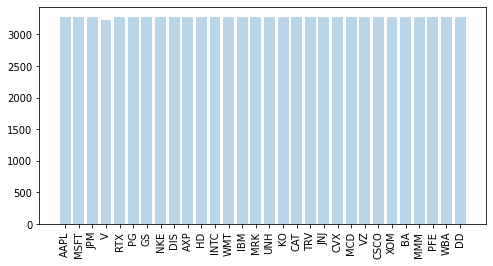

In [ ]:
# Plot a bar chart to check that all tickers have same number of data points
plt.subplots(figsize = (8, 4))
plt.bar(data_points_df[0], data_points_df[1],alpha=0.3)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# create a list for dates with all ticker data points
date_list = list(data[data['tic']=='V'].date)
# filter with date list
data_filtered = data[data['date'].isin(date_list)]

In [ ]:
# check if all tickers have the same number of data points

no_datasets = []
for i in ticker_list:
    no_data_points = data_filtered[data_filtered['tic']==i].shape[0]
    no_datasets.append((i,no_data_points))
    data_points_df = pd.DataFrame(no_datasets)

In [ ]:
data_points_df.head()

,0,1
0,AAPL,3221
1,MSFT,3221
2,JPM,3221
3,V,3221
4,RTX,3221


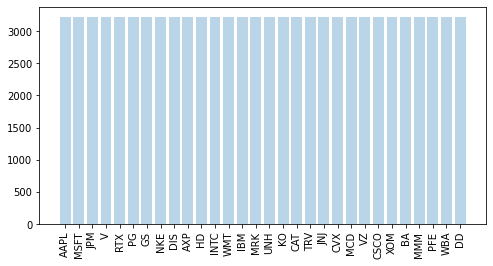

In [ ]:
# Plot a bar chart to check that all tickers have same number of data points
plt.subplots(figsize = (8, 4))
plt.bar(data_points_df[0], data_points_df[1],alpha=0.3)
plt.xticks(rotation=90)
plt.show()

In [ ]:
data_filtered.head()

,date,tic,close,high,low,open,volume
1537,2008-03-19,AAPL,3.970518,4.796071,4.631071,4.754286,1.010537e+09
1538,2008-03-19,AXP,33.486904,44.480000,41.919998,44.200001,1.409830e+07
1539,2008-03-19,BA,54.094528,77.000000,73.449997,76.980003,9.195600e+06
1540,2008-03-19,CAT,50.003796,77.000000,73.730003,76.620003,7.377400e+06
1541,2008-03-19,CSCO,17.922316,25.580000,24.459999,25.469999,6.398860e+07


### 2.5 Save the Data to csv

In [ ]:
data_filtered.to_csv('/content/Asset-Portfolio-Management-usingDeep-Reinforcement-Learning-/datasets/data.csv', index=False)

### 2.6 Create a Dataset for the Close Prices

In [ ]:
# read the data from the saved csv file
df_prices = pd.read_csv('/content/Asset-Portfolio-Management-usingDeep-Reinforcement-Learning-/datasets/data.csv')

In [ ]:
# Reset the Index to tic and date
df_prices = df_prices.reset_index().set_index(['tic', 'date']).sort_index()

# Get the list of all the tickers
tic_list = list(set([i for i,j in df_prices.index]))

# Create an empty data frame for the close prices
df_close = pd.DataFrame()

In [ ]:
len(tic_list)

30

In [ ]:
# Reset the Index to tic and date
df_prices = df_prices.reset_index().set_index(['tic', 'date']).sort_index()

# Get all the Close Prices
df_close = pd.DataFrame()

for ticker in tic_list:
    series = df_prices.xs(ticker).close
    df_close[ticker] = series
    
df_close = df_close.reset_index()

In [ ]:
df_close.head()

,date,RTX,TRV,DIS,MSFT,MMM,HD,V,WBA,NKE,AXP,AAPL,IBM,KO,XOM,MRK,MCD,INTC,CAT,BA,CSCO,CVX,JPM,PG,VZ,PFE,DD,UNH,WMT,GS,JNJ
0,2008-03-19,31.066071,33.120544,26.503475,21.289875,54.271484,19.065926,12.849033,26.163273,12.993440,33.486904,3.970518,72.884712,19.671188,51.317009,25.033487,36.110928,13.943850,50.003796,54.094528,17.922316,47.751389,30.057051,44.842640,16.877592,11.298723,33.980427,29.698526,37.222588,137.157700,43.434654
1,2008-03-20,31.179014,34.105396,27.063410,21.706453,53.253948,19.932566,14.634252,26.450939,14.136642,36.660183,4.080751,73.751060,20.025503,51.663467,25.248959,36.622356,14.380213,50.064850,55.088802,18.142044,48.521099,32.534088,45.874271,17.353222,11.287757,34.045757,29.506392,39.018482,147.982697,43.769375
2,2008-03-24,31.779915,34.034027,27.182180,21.699015,53.704681,20.784990,13.583590,27.767014,14.517013,37.800327,4.272435,74.206055,20.071436,52.240879,25.767214,37.530846,14.631454,51.563667,56.186127,18.779243,48.987606,32.944557,46.271038,17.761595,11.298723,35.147011,29.832195,39.311680,147.364838,43.441345
3,2008-03-25,31.698612,34.083973,27.216114,21.676701,53.936882,20.429815,14.384096,27.335508,14.367810,37.880047,4.316834,73.526703,20.146891,51.785015,26.011787,37.820225,14.724012,51.977360,55.898926,18.859810,49.296661,32.597771,45.986687,17.727962,11.391920,35.333679,29.472973,38.886536,147.982697,43.213722
4,2008-03-26,31.450113,33.934113,26.944635,21.245239,53.718315,20.003599,14.545564,27.299547,13.926496,36.165859,4.441764,72.866043,20.061598,52.429291,26.029245,37.416462,14.452935,52.465675,56.193504,18.149361,49.541557,31.217722,46.052811,17.362829,11.342580,35.287006,28.487194,38.776588,144.563843,43.314144


In [ ]:
# Get Discriptive statistics
df_close.describe().T

,count,mean,std,min,25%,50%,75%,max
RTX,3221.0,52.242246,17.193311,17.399847,37.445942,54.833832,63.419285,93.678154
TRV,3221.0,79.037697,34.917219,22.049955,44.205288,79.533058,110.256035,146.525116
DIS,3221.0,73.345217,38.673326,13.424540,33.302662,79.883453,103.509399,181.179993
MSFT,3221.0,57.758522,51.076653,11.511728,22.076899,36.873390,73.686424,229.124512
MMM,3221.0,112.535726,50.097798,29.507017,64.380936,115.709320,153.691345,227.755096
HD,3221.0,96.399307,72.238641,13.140462,28.550159,70.438469,149.465836,284.083557
V,3221.0,71.449423,57.427943,9.679837,20.087591,52.133114,105.222961,217.394577
WBA,3221.0,45.313368,18.493992,15.477387,26.927691,45.126396,63.063324,80.606339
NKE,3221.0,44.255624,29.090165,8.251169,18.933928,36.451313,60.434235,143.202042
AXP,3221.0,65.258888,28.377182,8.361459,40.072521,66.495003,84.731148,133.439072


In [ ]:
# Save the Close Price datase

df_close.to_csv('/content/Asset-Portfolio-Management-usingDeep-Reinforcement-Learning-/datasets/close_prices.csv', index=False)

In [ ]:
# Close prices for all the stocks
df_close_full_stocks = df_close

In [ ]:
df_close_full_stocks.head()

,date,RTX,TRV,DIS,MSFT,MMM,HD,V,WBA,NKE,AXP,AAPL,IBM,KO,XOM,MRK,MCD,INTC,CAT,BA,CSCO,CVX,JPM,PG,VZ,PFE,DD,UNH,WMT,GS,JNJ
0,2008-03-19,31.066071,33.120544,26.503475,21.289875,54.271484,19.065926,12.849033,26.163273,12.993440,33.486904,3.970518,72.884712,19.671188,51.317009,25.033487,36.110928,13.943850,50.003796,54.094528,17.922316,47.751389,30.057051,44.842640,16.877592,11.298723,33.980427,29.698526,37.222588,137.157700,43.434654
1,2008-03-20,31.179014,34.105396,27.063410,21.706453,53.253948,19.932566,14.634252,26.450939,14.136642,36.660183,4.080751,73.751060,20.025503,51.663467,25.248959,36.622356,14.380213,50.064850,55.088802,18.142044,48.521099,32.534088,45.874271,17.353222,11.287757,34.045757,29.506392,39.018482,147.982697,43.769375
2,2008-03-24,31.779915,34.034027,27.182180,21.699015,53.704681,20.784990,13.583590,27.767014,14.517013,37.800327,4.272435,74.206055,20.071436,52.240879,25.767214,37.530846,14.631454,51.563667,56.186127,18.779243,48.987606,32.944557,46.271038,17.761595,11.298723,35.147011,29.832195,39.311680,147.364838,43.441345
3,2008-03-25,31.698612,34.083973,27.216114,21.676701,53.936882,20.429815,14.384096,27.335508,14.367810,37.880047,4.316834,73.526703,20.146891,51.785015,26.011787,37.820225,14.724012,51.977360,55.898926,18.859810,49.296661,32.597771,45.986687,17.727962,11.391920,35.333679,29.472973,38.886536,147.982697,43.213722
4,2008-03-26,31.450113,33.934113,26.944635,21.245239,53.718315,20.003599,14.545564,27.299547,13.926496,36.165859,4.441764,72.866043,20.061598,52.429291,26.029245,37.416462,14.452935,52.465675,56.193504,18.149361,49.541557,31.217722,46.052811,17.362829,11.342580,35.287006,28.487194,38.776588,144.563843,43.314144


In [ ]:
%store df_close_full_stocks

Stored 'df_close_full_stocks' (DataFrame)


In [ ]:
ticker_list = df_close_full_stocks.columns

In [ ]:
print(ticker_list)

Index(['date', 'RTX', 'TRV', 'DIS', 'MSFT', 'MMM', 'HD', 'V', 'WBA', 'NKE',
       'AXP', 'AAPL', 'IBM', 'KO', 'XOM', 'MRK', 'MCD', 'INTC', 'CAT', 'BA',
       'CSCO', 'CVX', 'JPM', 'PG', 'VZ', 'PFE', 'DD', 'UNH', 'WMT', 'GS',
       'JNJ'],
      dtype='object')


# Asset Portfolio Management using Deep Reinforcement Learning
----

## 3.0 Stock Selection
---
Auto Encoders are employed to select the less volatile stocks by choosing stocks with less reconstruction error. These are the stocks that are included in the portfolio

### 3.1 Import Relevant Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

In [ ]:
from numpy import array
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense, Activation
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils.vis_utils import plot_model #Correction made
from keras import regularizers, optimizers

from sklearn import preprocessing

### 3.2 Load the Data

In [ ]:
# Load the close prices dataset
prices_data = pd.read_csv('/content/Asset-Portfolio-Management-usingDeep-Reinforcement-Learning-/datasets/close_prices.csv')

In [ ]:
df = prices_data.copy()

In [ ]:
df = df.reset_index(drop=True).set_index(['date'])

In [ ]:
df.head()

,RTX,TRV,DIS,MSFT,MMM,HD,V,WBA,NKE,AXP,AAPL,IBM,KO,XOM,MRK,MCD,INTC,CAT,BA,CSCO,CVX,JPM,PG,VZ,PFE,DD,UNH,WMT,GS,JNJ
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-03-19,31.066071,33.120544,26.503475,21.289875,54.271484,19.065926,12.849033,26.163273,12.993440,33.486904,3.970518,72.884712,19.671188,51.317009,25.033487,36.110928,13.943850,50.003796,54.094528,17.922316,47.751389,30.057051,44.842640,16.877592,11.298723,33.980427,29.698526,37.222588,137.157700,43.434654
2008-03-20,31.179014,34.105396,27.063410,21.706453,53.253948,19.932566,14.634252,26.450939,14.136642,36.660183,4.080751,73.751060,20.025503,51.663467,25.248959,36.622356,14.380213,50.064850,55.088802,18.142044,48.521099,32.534088,45.874271,17.353222,11.287757,34.045757,29.506392,39.018482,147.982697,43.769375
2008-03-24,31.779915,34.034027,27.182180,21.699015,53.704681,20.784990,13.583590,27.767014,14.517013,37.800327,4.272435,74.206055,20.071436,52.240879,25.767214,37.530846,14.631454,51.563667,56.186127,18.779243,48.987606,32.944557,46.271038,17.761595,11.298723,35.147011,29.832195,39.311680,147.364838,43.441345
2008-03-25,31.698612,34.083973,27.216114,21.676701,53.936882,20.429815,14.384096,27.335508,14.367810,37.880047,4.316834,73.526703,20.146891,51.785015,26.011787,37.820225,14.724012,51.977360,55.898926,18.859810,49.296661,32.597771,45.986687,17.727962,11.391920,35.333679,29.472973,38.886536,147.982697,43.213722
2008-03-26,31.450113,33.934113,26.944635,21.245239,53.718315,20.003599,14.545564,27.299547,13.926496,36.165859,4.441764,72.866043,20.061598,52.429291,26.029245,37.416462,14.452935,52.465675,56.193504,18.149361,49.541557,31.217722,46.052811,17.362829,11.342580,35.287006,28.487194,38.776588,144.563843,43.314144


### 3.3 Define Functions

In [ ]:
def defineAutoencoder(num_stock, encoding_dim = 5, verbose=0):
    
    """
    Function for fitting an Autoencoder
    """

    # connect all layers
    input = Input(shape=(num_stock,))

    encoded = Dense(encoding_dim, kernel_regularizer=regularizers.l2(0.00001),name ='Encoder_Input')(input)

    decoded = Dense(num_stock, kernel_regularizer=regularizers.l2(0.00001), name ='Decoder_Input')(encoded)
    decoded = Activation("linear", name='Decoder_Activation_function')(decoded)

    # construct and compile AE model
    autoencoder = Model(inputs=input, outputs=decoded)
    adam = tf.optimizers.Adam(lr=0.0005)
    autoencoder.compile(optimizer=adam, loss='mean_squared_error')
    if verbose!= 0:
        autoencoder.summary()

    return autoencoder

In [ ]:
def getReconstructionErrorsDF(df_pct_change, reconstructed_data):
    
    """
    Function for calculating the reconstruction Errors
    """
    array = []
    stocks_ranked = []
    num_columns = reconstructed_data.shape[1]
    for i in range(0, num_columns):
        diff = np.linalg.norm((df_pct_change.iloc[:, i] - reconstructed_data[:, i]))  # 2 norm difference
        array.append(float(diff))

    ranking = np.array(array).argsort()
    r = 1
    for stock_index in ranking:
        stocks_ranked.append([ r
                              ,stock_index
                              ,df_pct_change.iloc[:, stock_index].name
                              ,array[stock_index]
                              ])
        r = r + 1

    columns = ['ranking','stock_index', 'stock_name' ,'recreation_error']
    df = pd.DataFrame(stocks_ranked, columns=columns)
    df = df.set_index('stock_name')
    return df

### 3.4 Get the Percentage Change of the Close Prices

In [ ]:
col_names = df.columns.to_list()

In [ ]:
print(col_names)

['RTX', 'TRV', 'DIS', 'MSFT', 'MMM', 'HD', 'V', 'WBA', 'NKE', 'AXP', 'AAPL', 'IBM', 'KO', 'XOM', 'MRK', 'MCD', 'INTC', 'CAT', 'BA', 'CSCO', 'CVX', 'JPM', 'PG', 'VZ', 'PFE', 'DD', 'UNH', 'WMT', 'GS', 'JNJ']


In [ ]:
df_pct_change = df.pct_change(1).astype(float)
df_pct_change = df_pct_change.replace([np.inf, -np.inf], np.nan)
df_pct_change = df_pct_change.fillna(method='ffill')

# the percentage change function will make the first two rows equal to nan
df_pct_change = df_pct_change.tail(len(df_pct_change) - 2)

In [ ]:
df_pct_change.shape

(3219, 30)

In [ ]:
# remove columns where there is no change over a longer time period
df_pct_change = df_pct_change[df_pct_change.columns[((df_pct_change == 0).mean() <= 0.05)]]

In [ ]:
df_pct_change.head()

,RTX,TRV,DIS,MSFT,MMM,HD,V,WBA,NKE,AXP,AAPL,IBM,KO,XOM,MRK,MCD,INTC,CAT,BA,CSCO,CVX,JPM,PG,VZ,PFE,DD,UNH,WMT,GS,JNJ
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-03-24,0.019273,-0.002093,0.004389,-0.000343,0.008464,0.042765,-0.071795,0.049755,0.026907,0.031100,0.046973,0.006169,0.002294,0.011176,0.020526,0.024807,0.017471,0.029938,0.019919,0.035123,0.009615,0.012617,0.008649,0.023533,0.000972,0.032346,0.011042,0.007514,-0.004175,-0.007495
2008-03-25,-0.002558,0.001468,0.001248,-0.001028,0.004324,-0.017088,0.058932,-0.015540,-0.010278,0.002109,0.010392,-0.009155,0.003759,-0.008726,0.009492,0.007710,0.006326,0.008023,-0.005112,0.004290,0.006309,-0.010526,-0.006145,-0.001894,0.008248,0.005311,-0.012041,-0.010815,0.004193,-0.005240
2008-03-26,-0.007839,-0.004397,-0.009975,-0.019904,-0.004052,-0.020862,0.011225,-0.001316,-0.030716,-0.045253,0.028940,-0.008985,-0.004234,0.012441,0.000671,-0.010676,-0.018411,0.009395,0.005270,-0.037670,0.004968,-0.042336,0.001438,-0.020596,-0.004331,-0.001321,-0.033447,-0.002827,-0.023103,0.002324
2008-03-27,-0.002873,-0.001893,-0.011965,-0.017857,-0.010170,-0.013139,-0.016417,-0.018440,-0.004376,-0.011684,-0.033159,-0.011890,0.002616,-0.000696,0.001790,-0.002698,-0.035224,-0.004266,-0.027261,-0.024213,-0.006591,-0.028339,-0.003303,-0.004980,-0.006283,-0.013640,-0.002932,-0.010019,-0.041828,-0.001236
2008-03-28,-0.012391,-0.000842,-0.012109,-0.004991,0.001156,-0.014754,-0.002384,0.004563,-0.001819,-0.037475,0.019679,-0.008223,-0.006035,-0.011369,-0.006029,0.000541,-0.014225,0.000779,-0.010105,-0.004135,0.001185,-0.003500,0.000432,-0.003059,-0.002919,-0.005965,0.011765,-0.004774,-0.021946,-0.006809


### 3.5 Construct the Autoencoder

In [ ]:
# define the input parameters
hidden_layers = 5
batch_size = 500
epochs = 500
stock_selection_number = 20
num_stock = df_pct_change.shape[1]
verbose = 1

In [ ]:
print('-' * 20 + 'Step 1 : Returns vs. recreation error (recreation_error)')
print('-' * 25 + 'Transform dataset with MinMax Scaler')

--------------------Step 1 : Returns vs. recreation error (recreation_error)
-------------------------Transform dataset with MinMax Scaler


In [ ]:
# Normalize the data
df_scaler = preprocessing.MinMaxScaler()
df_pct_change_normalised = df_scaler.fit_transform(df_pct_change)

In [ ]:
# define autoencoder
print('-' * 25 + 'Define autoencoder model')
num_stock = len(df_pct_change.columns)
autoencoder = defineAutoencoder(num_stock=num_stock, encoding_dim=hidden_layers, verbose=verbose)
#plot_model(autoencoder, to_file='img/model_autoencoder_1.png', show_shapes=True,
#           show_layer_names=True)

-------------------------Define autoencoder model
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 Encoder_Input (Dense)       (None, 5)                 155       
                                                                 
 Decoder_Input (Dense)       (None, 30)                180       
                                                                 
 Decoder_Activation_function  (None, 30)               0         
  (Activation)                                                   
                                                                 
Total params: 335
Trainable params: 335
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# train autoencoder
print('-' * 25 + 'Train autoencoder model')
autoencoder.fit(df_pct_change_normalised, df_pct_change_normalised, shuffle=False, epochs=epochs,
                batch_size=batch_size,
                verbose=verbose)

-------------------------Train autoencoder model
Epoch 1/500
7/7 [==============================] - 1s 3ms/step - loss: 0.2901
Epoch 2/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2667
Epoch 3/500
7/7 [==============================] - 0s 3ms/step - loss: 0.2468
Epoch 4/500
7/7 [==============================] - 0s 3ms/step - loss: 0.2299
Epoch 5/500
7/7 [==============================] - 0s 2ms/step - loss: 0.2155
Epoch 6/500
7/7 [==============================] - 0s 3ms/step - loss: 0.2032
Epoch 7/500
7/7 [==============================] - 0s 3ms/step - loss: 0.1926
Epoch 8/500
7/7 [==============================] - 0s 3ms/step - loss: 0.1830
Epoch 9/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1742
Epoch 10/500
7/7 [==============================] - 0s 3ms/step - loss: 0.1658
Epoch 11/500
7/7 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 12/500
7/7 [==============================] - 0s 3ms/step - loss: 0.1496
Epoch 13/500

In [ ]:
# predict autoencoder
print('-' * 25 + 'Predict autoencoder model')
reconstruct = autoencoder.predict(df_pct_change_normalised)

-------------------------Predict autoencoder model


In [ ]:
# Inverse transform dataset with MinMax Scaler
print('-' * 25 + 'Inverse transform dataset with MinMax Scaler')
reconstruct_real = df_scaler.inverse_transform(reconstruct)
df_reconstruct_real = pd.DataFrame(data=reconstruct_real, columns=df_pct_change.columns)

-------------------------Inverse transform dataset with MinMax Scaler


In [ ]:
print('-' * 25 + 'Calculate L2 norm as reconstruction loss metric')
df_recreation_error = getReconstructionErrorsDF(df_pct_change=df_pct_change,
                                                reconstructed_data=reconstruct_real)

-------------------------Calculate L2 norm as reconstruction loss metric


In [ ]:
df_recreation_error

,ranking,stock_index,recreation_error
stock_name,,,
PFE,1,24,0.469698
JNJ,2,29,0.506579
KO,3,12,0.526227
VZ,4,23,0.546084
PG,5,22,0.554085
IBM,6,11,0.597915
RTX,7,0,0.598984
MCD,8,15,0.601962
WMT,9,27,0.614565


In [ ]:
filtered_stocks = df_recreation_error.head(stock_selection_number).index

In [ ]:
filtered_stocks

Index(['PFE', 'JNJ', 'KO', 'VZ', 'PG', 'IBM', 'RTX', 'MCD', 'WMT', 'MMM',
       'XOM', 'CVX', 'HD', 'NKE', 'MRK', 'DIS', 'WBA', 'MSFT', 'AAPL', 'INTC'],
      dtype='object', name='stock_name')

In [ ]:
# store the list of selected stocks
%store filtered_stocks

Stored 'filtered_stocks' (Index)


# Asset Portfolio Management using Deep Reinforcement Learning
---

## 4.0 Feature Engineering and Data Preprocessing
---
We perform feature engineering and data preprocessing by:
* Adding Technical Indicators to the data. The technical inicators are used as inputs in the training of our Reinforcement Learning Model
* Adding Coveriance Matrices which is also used as input for training the Models
* Splitting the data into the training set and the testing (trading) set

### 4.1 Import Relevant Libraries

In [ ]:
import pandas as pd
import numpy as np
import ta
from ta import add_all_ta_features
from ta.utils import dropna
from finrl.neo_finrl.preprocessor.preprocessors import FeatureEngineer, data_split # Changes made

### 4.2 Load the Data from the csv Files

In [ ]:
# Load the whole data set
data = pd.read_csv('/content/Asset-Portfolio-Management-usingDeep-Reinforcement-Learning-/datasets/data.csv')

# Load the close prices dataset
prices_data = pd.read_csv('/content/Asset-Portfolio-Management-usingDeep-Reinforcement-Learning-/datasets/close_prices.csv')

In [ ]:
%store -r filtered_stocks

In [ ]:
list_of_stocks = filtered_stocks
print(list_of_stocks)

Index(['PFE', 'JNJ', 'KO', 'VZ', 'PG', 'IBM', 'RTX', 'MCD', 'WMT', 'MMM',
       'XOM', 'CVX', 'HD', 'NKE', 'MRK', 'DIS', 'WBA', 'MSFT', 'AAPL', 'INTC'],
      dtype='object', name='stock_name')


In [ ]:
data.head()

,date,tic,close,high,low,open,volume
0,2008-03-19,AAPL,3.970518,4.796071,4.631071,4.754286,1.010537e+09
1,2008-03-19,AXP,33.486904,44.480000,41.919998,44.200001,1.409830e+07
2,2008-03-19,BA,54.094528,77.000000,73.449997,76.980003,9.195600e+06
3,2008-03-19,CAT,50.003796,77.000000,73.730003,76.620003,7.377400e+06
4,2008-03-19,CSCO,17.922316,25.580000,24.459999,25.469999,6.398860e+07


In [ ]:
data = data[data['tic'].isin(list_of_stocks)]

In [ ]:
data.tic.unique()

array(['AAPL', 'CVX', 'DIS', 'HD', 'IBM', 'INTC', 'JNJ', 'KO', 'MCD',
       'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'RTX', 'VZ', 'WBA',
       'WMT', 'XOM'], dtype=object)

### 4.3 Add Technical Indicators
---
We define a function to add technical indicators to the dataset by making use of the ta library

The folloing indicators are considered:
* Volatility Average True Range (ATR)
* Volatility Bollinger Band Width (BBW)
* Volume On-balance Volume (OBV
* Volume Chaikin Money Flow (CMF)
* Trend Moving Average Convergence Divergence (MACD)
* Trend Average Directional Index (ADX)
* Trend Fast Simple Moving Average (SMA)
* Trend Fast Exponential Moving Average (EMA)
* Trend Commodity Channel Index (CCI)
* Momentum Relative Strength Index (RSI)

In [ ]:
# Define a Function for adding technical indicators

def add_features(data, feature_list, short_names):
    """
    Function to add technical indicators for features
    -Takes in a dataset with Open, High, Low, Close and Volume
    -Also takes in a list of the technical indicators to be added 
     as well as a list of the shortened indicator names
    """
    
    # list of column names to filter the features
    data_col_names = list(data.columns)
    filter_names = data_col_names + feature_list
    col_rename = data_col_names +  short_names
    
    # Add technical indicators using the ta Library
    data = add_all_ta_features(data, open="open", high="high", 
    low="low", close="close", volume="volume") 
    
    # Filter the Indicators with the required features
    data = data[filter_names]
    data.columns = col_rename # rename the columns to use shortened indicator names
    data = data.dropna()
    
    return data

In [ ]:
# List of Features to add
feature_list= ['volatility_atr','volatility_bbw','volume_obv','volume_cmf',
               'trend_macd', 'trend_adx', 'trend_sma_fast', 
               'trend_ema_fast', 'trend_cci', 'momentum_rsi']

# Short names of the features
short_names = ['atr', 'bbw','obv','cmf','macd', 'adx', 'sma', 'ema', 'cci', 'rsi']

#feature_list= ['volatility_atr','volatility_bbw','volume_obv','volume_cmf','trend_macd']

# Short names of the features
#short_names = ['atr', 'bbw','obv','cmf','macd']

In [ ]:
# Add Indicators to our dataset
data_with_features = data.copy()

data_with_features = add_features(data_with_features, feature_list, short_names)

/usr/local/lib/python3.7/dist-packages/ta/volume.py:319: RuntimeWarning: overflow encountered in double_scalars
  self._nvi.iloc[i] = self._nvi.iloc[i - 1] * (1.0 + price_change.iloc[i])
/usr/local/lib/python3.7/dist-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/usr/local/lib/python3.7/dist-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [ ]:
data_with_features.head()

,date,tic,close,high,low,open,volume,atr,bbw,obv,cmf,macd,adx,sma,ema,cci,rsi
41,2008-03-20,INTC,14.380213,21.760000,21.090000,21.469999,67373400.0,37.824863,220.586908,-138400189.0,-13.766200,4.293419,0.000000,32.934856,32.129087,-75.419668,47.813787
42,2008-03-20,JNJ,43.769375,65.500000,64.889999,64.970001,16276300.0,39.154355,220.627469,-122123889.0,-14.088314,4.903958,0.000000,32.845417,33.919900,55.650653,52.461609
44,2008-03-20,KO,20.025503,30.570000,30.020000,30.080000,31028600.0,36.613857,220.352283,-153152489.0,-14.372592,3.432317,7.267213,31.925370,31.782301,-49.279997,48.688744
45,2008-03-20,MCD,36.622356,54.759998,53.700001,53.950001,13075600.0,36.425921,220.273990,-140076889.0,-14.520554,3.564172,7.083449,33.570767,32.526925,23.031960,51.323889
46,2008-03-20,MMM,53.253948,79.339996,77.459999,78.500000,6937300.0,37.055093,219.758770,-133139589.0,-14.576140,4.953597,7.202514,35.828323,35.715697,96.590962,53.879967


In [ ]:
feature_list = list(data_with_features.columns)[7:]

In [ ]:
print(feature_list)

['atr', 'bbw', 'obv', 'cmf', 'macd', 'adx', 'sma', 'ema', 'cci', 'rsi']


### 4.4 Add Covariance Matrix
---
We define a function that will add Covarance Matrices to our dataset

In [ ]:
def add_cov_matrix(df):
    """
    Function to add Coveriance Matrices as part of the defined states
    """
    # Sort the data and index by date and tic
    df=df.sort_values(['date','tic'],ignore_index=True) 
    df.index = df.date.factorize()[0]
    
    cov_list = [] # create empty list for storing coveriance matrices at each time step
    
    # look back for constructing the coveriance matrix is one year
    lookback=252
    for i in range(lookback,len(df.index.unique())):
        data_lookback = df.loc[i-lookback:i,:]
        price_lookback=data_lookback.pivot_table(index = 'date',columns = 'tic', values = 'close')
        return_lookback = price_lookback.pct_change().dropna()
        covs = return_lookback.cov().values 
        covs = covs#/covs.max()
        cov_list.append(covs)
        
    df_cov = pd.DataFrame({'date':df.date.unique()[lookback:],'cov_list':cov_list})
    df = df.merge(df_cov, on='date')
    df = df.sort_values(['date','tic']).reset_index(drop=True)
    
    return df

In [ ]:
# Add Covariance Matrices to our dataset
data_with_features_covs = data_with_features.copy()
data_with_features_covs = add_cov_matrix(data_with_features_covs)

In [ ]:
data_with_features_covs.head()

,date,tic,close,high,low,open,volume,atr,bbw,obv,cmf,macd,adx,sma,ema,cci,rsi,cov_list
0,2009-03-20,AAPL,3.110704,3.682500,3.591786,3.646071,695587200.0,23.244070,240.429138,-2.897846e+11,-14.134574,-0.626934,4.900005,20.555543,22.136168,-107.590220,45.320535,"[[0.0013155167709794993, 0.0007396899865970468..."
1,2009-03-20,CVX,38.960262,67.980003,64.269997,67.540001,23811700.0,27.406593,239.786780,-2.897608e+11,-14.013332,0.761599,5.266251,21.011773,24.724491,100.362928,53.283876,"[[0.0013155167709794993, 0.0007396899865970468..."
2,2009-03-20,DIS,15.026185,17.980000,17.080000,17.799999,17766600.0,26.853960,240.005250,-2.897786e+11,-13.997582,-0.068470,5.056635,20.933035,23.232444,-56.392741,48.233356,"[[0.0013155167709794993, 0.0007396899865970468..."
3,2009-03-20,HD,16.379534,22.730000,21.760000,22.590000,22361800.0,24.938945,240.198671,-2.897562e+11,-13.875179,-0.610069,4.774062,21.212677,22.178150,-42.364431,48.530433,"[[0.0013155167709794993, 0.0007396899865970468..."
4,2009-03-20,IBM,58.762367,90.822182,88.126198,89.063095,12754819.0,29.889315,240.047446,-2.897435e+11,-13.800260,2.353520,5.485518,25.280573,27.806491,185.750235,56.876751,"[[0.0013155167709794993, 0.0007396899865970468..."


### 4.6 Store the Dataframe

In [ ]:
df = data_with_features_covs

In [ ]:
%store df

Stored 'df' (DataFrame)


# Asset Portfolio Management using Deep Reinforcement Learning
---

## 5.0 Feature Reduction
---

Autoencoders are used to reduce the number of technical indicators to be represented by only two features

### 5.1 Import Relevant Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [ ]:
# lstm autoencoder recreate sequence
from numpy import array
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils.vis_utils import plot_model

from sklearn import preprocessing

### 5.2 Load the Data

In [ ]:
%store -r df

In [ ]:
df.head()

,date,tic,close,high,low,open,volume,atr,bbw,obv,cmf,macd,adx,sma,ema,cci,rsi,cov_list
0,2009-03-20,AAPL,3.110704,3.682500,3.591786,3.646071,695587200.0,23.244070,240.429138,-2.897846e+11,-14.134574,-0.626934,4.900005,20.555543,22.136168,-107.590220,45.320535,"[[0.0013155167709794993, 0.0007396899865970468..."
1,2009-03-20,CVX,38.960262,67.980003,64.269997,67.540001,23811700.0,27.406593,239.786780,-2.897608e+11,-14.013332,0.761599,5.266251,21.011773,24.724491,100.362928,53.283876,"[[0.0013155167709794993, 0.0007396899865970468..."
2,2009-03-20,DIS,15.026185,17.980000,17.080000,17.799999,17766600.0,26.853960,240.005250,-2.897786e+11,-13.997582,-0.068470,5.056635,20.933035,23.232444,-56.392741,48.233356,"[[0.0013155167709794993, 0.0007396899865970468..."
3,2009-03-20,HD,16.379534,22.730000,21.760000,22.590000,22361800.0,24.938945,240.198671,-2.897562e+11,-13.875179,-0.610069,4.774062,21.212677,22.178150,-42.364431,48.530433,"[[0.0013155167709794993, 0.0007396899865970468..."
4,2009-03-20,IBM,58.762367,90.822182,88.126198,89.063095,12754819.0,29.889315,240.047446,-2.897435e+11,-13.800260,2.353520,5.485518,25.280573,27.806491,185.750235,56.876751,"[[0.0013155167709794993, 0.0007396899865970468..."


In [ ]:
# Get the list of all the features
features_list = list(df.columns)[7:-1]

In [ ]:
print(features_list)

['atr', 'bbw', 'obv', 'cmf', 'macd', 'adx', 'sma', 'ema', 'cci', 'rsi']


### 5.2 Construct a Data Frame of Features

In [ ]:
# construct a data frame of features
features_df = df[features_list]
features_df.index = df['date']

In [ ]:
features_df.head()

,atr,bbw,obv,cmf,macd,adx,sma,ema,cci,rsi
date,,,,,,,,,,
2009-03-20,23.244070,240.429138,-2.897846e+11,-14.134574,-0.626934,4.900005,20.555543,22.136168,-107.590220,45.320535
2009-03-20,27.406593,239.786780,-2.897608e+11,-14.013332,0.761599,5.266251,21.011773,24.724491,100.362928,53.283876
2009-03-20,26.853960,240.005250,-2.897786e+11,-13.997582,-0.068470,5.056635,20.933035,23.232444,-56.392741,48.233356
2009-03-20,24.938945,240.198671,-2.897562e+11,-13.875179,-0.610069,4.774062,21.212677,22.178150,-42.364431,48.530433
2009-03-20,29.889315,240.047446,-2.897435e+11,-13.800260,2.353520,5.485518,25.280573,27.806491,185.750235,56.876751


In [ ]:
features_df.shape

(59360, 10)

In [ ]:
df.shape

(59360, 18)

### 5.3 Normalize the Features and Construct an Autoencoder

In [ ]:
features_array = np.array(features_df)

features_scaler = preprocessing.MinMaxScaler()
features_normalised = features_scaler.fit_transform(features_array)

In [ ]:
features_normalised.shape

(59360, 10)

In [ ]:
# rescale the features array
features_normalised = features_normalised.reshape(-1,20,10)

In [ ]:
features_normalised.shape

(2968, 20, 10)

In [ ]:
# define model
model = Sequential()
model.add(LSTM(4, activation='relu', input_shape=(20,10)))
model.add(RepeatVector(20))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(10)))
model.compile(optimizer='adam', loss='mse')

Epoch 1/100
93/93 [==============================] - 5s 23ms/step - loss: 0.0670
Epoch 2/100
93/93 [==============================] - 2s 22ms/step - loss: 0.0143
Epoch 3/100
93/93 [==============================] - 2s 23ms/step - loss: 0.0095
Epoch 4/100
93/93 [==============================] - 2s 23ms/step - loss: 0.0082
Epoch 5/100
93/93 [==============================] - 2s 22ms/step - loss: 0.0074
Epoch 6/100
93/93 [==============================] - 2s 23ms/step - loss: 0.0065
Epoch 7/100
93/93 [==============================] - 2s 23ms/step - loss: 0.0058
Epoch 8/100
93/93 [==============================] - 2s 22ms/step - loss: 0.0051
Epoch 9/100
93/93 [==============================] - 2s 23ms/step - loss: 0.0043
Epoch 10/100
93/93 [==============================] - 2s 23ms/step - loss: 0.0036
Epoch 11/100
93/93 [==============================] - 2s 22ms/step - loss: 0.0026
Epoch 12/100
93/93 [==============================] - 2s 22ms/step - loss: 0.0023
Epoch 13/100
93/93 [=====

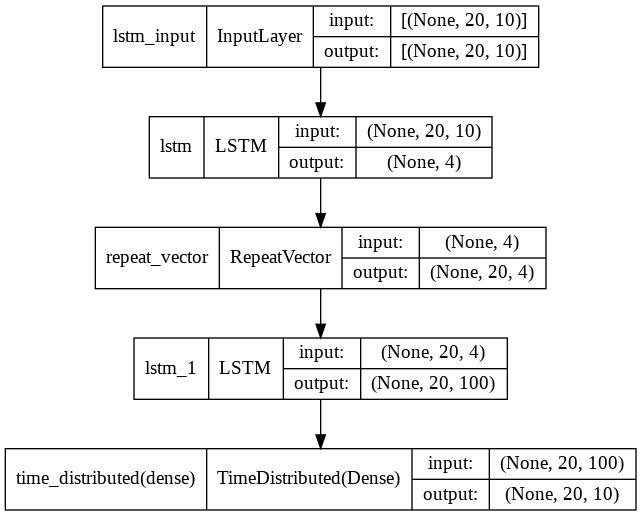

In [ ]:
# fit model
model.fit(features_normalised, features_normalised, epochs=100, verbose=1)
plot_model(model, show_shapes=True, to_file='./results/reconstruct_lstm_autoencoder.png')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 240       
                                                                 
 repeat_vector (RepeatVector  (None, 20, 4)            0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 20, 100)           42000     
                                                                 
 time_distributed (TimeDistr  (None, 20, 10)           1010      
 ibuted)                                                         
                                                                 
Total params: 43,250
Trainable params: 43,250
Non-trainable params: 0
_________________________________________________________________


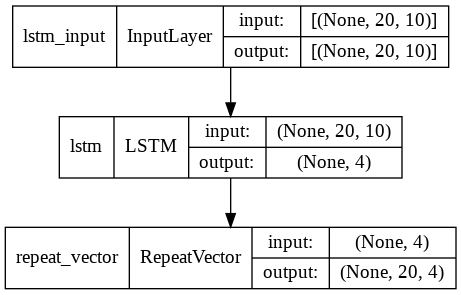

In [ ]:
# connect the encoder LSTM as the output layer
model_feature = Model(inputs=model.inputs, outputs=model.layers[1].output)
plot_model(model_feature, show_shapes=True, show_layer_names=True, to_file='./results/lstm_encoder.png')

In [ ]:
model_feature.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 20, 10)]          0         
                                                                 
 lstm (LSTM)                 (None, 4)                 240       
                                                                 
 repeat_vector (RepeatVector  (None, 20, 4)            0         
 )                                                               
                                                                 
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


### 5.4 Get the Reconstructed Features

In [ ]:
# get the feature vector for the input sequence
yhat = model_feature.predict(features_normalised)
print(yhat.shape)

(2968, 20, 4)


In [ ]:
# reshape the vector
features_reduced = yhat.reshape(-1,4)

In [ ]:
df.shape

(59360, 18)

In [ ]:
features_reduced.shape

(59360, 4)

In [ ]:
# Copy original data frame and drop the original features
df_reduced = df.copy()
df_reduced = df_reduced .drop(features_list, axis=1)

In [ ]:
df_reduced.head()

,date,tic,close,high,low,open,volume,cov_list
0,2009-03-20,AAPL,3.110704,3.682500,3.591786,3.646071,695587200.0,"[[0.0013155167709794993, 0.0007396899865970468..."
1,2009-03-20,CVX,38.960262,67.980003,64.269997,67.540001,23811700.0,"[[0.0013155167709794993, 0.0007396899865970468..."
2,2009-03-20,DIS,15.026185,17.980000,17.080000,17.799999,17766600.0,"[[0.0013155167709794993, 0.0007396899865970468..."
3,2009-03-20,HD,16.379534,22.730000,21.760000,22.590000,22361800.0,"[[0.0013155167709794993, 0.0007396899865970468..."
4,2009-03-20,IBM,58.762367,90.822182,88.126198,89.063095,12754819.0,"[[0.0013155167709794993, 0.0007396899865970468..."


In [ ]:
# convert the reduced features to a data frame and merge with the original data frame
features_reduced_df = pd.DataFrame(features_reduced, columns=['f01','f02','f03','f04'])

In [ ]:
features_reduced_df.head()

,f01,f02,f03,f04
0,0.980409,0.622131,4.136142,3.71955
1,0.980409,0.622131,4.136142,3.71955
2,0.980409,0.622131,4.136142,3.71955
3,0.980409,0.622131,4.136142,3.71955
4,0.980409,0.622131,4.136142,3.71955


In [ ]:
df_reduced[['f01','f02','f03','f04']] = features_reduced_df[['f01','f02','f03','f04']]

In [ ]:
df_reduced.head()

,date,tic,close,high,low,open,volume,cov_list,f01,f02,f03,f04
0,2009-03-20,AAPL,3.110704,3.682500,3.591786,3.646071,695587200.0,"[[0.0013155167709794993, 0.0007396899865970468...",0.980409,0.622131,4.136142,3.71955
1,2009-03-20,CVX,38.960262,67.980003,64.269997,67.540001,23811700.0,"[[0.0013155167709794993, 0.0007396899865970468...",0.980409,0.622131,4.136142,3.71955
2,2009-03-20,DIS,15.026185,17.980000,17.080000,17.799999,17766600.0,"[[0.0013155167709794993, 0.0007396899865970468...",0.980409,0.622131,4.136142,3.71955
3,2009-03-20,HD,16.379534,22.730000,21.760000,22.590000,22361800.0,"[[0.0013155167709794993, 0.0007396899865970468...",0.980409,0.622131,4.136142,3.71955
4,2009-03-20,IBM,58.762367,90.822182,88.126198,89.063095,12754819.0,"[[0.0013155167709794993, 0.0007396899865970468...",0.980409,0.622131,4.136142,3.71955


In [ ]:
data_df = df_reduced.copy()

In [ ]:
%store data_df

Stored 'data_df' (DataFrame)


# Asset Portfolio Management using Deep Reinforcement Learning
---

## 6.0 Data Split
---

We will split both the close prices and the whole dataset into train and test (trade) data.

We will use 80% of the data for training and then test on the remaining 20%.

We will make use of the FinRL Library function of data_split to split our data into train and test

### 6.1 Import Relevant Libraries

In [ ]:
import pandas as pd
import numpy as np
import ta
from ta import add_all_ta_features
from ta.utils import dropna
from finrl.neo_finrl.preprocessor.preprocessors import FeatureEngineer, data_split

### 6.2 Load the data

In [ ]:
%store -r data_df
%store -r filtered_stocks
%store -r df_close_full_stocks

In [ ]:
data_df.head()

,date,tic,close,high,low,open,volume,cov_list,f01,f02,f03,f04
0,2009-03-20,AAPL,3.110704,3.682500,3.591786,3.646071,695587200.0,"[[0.0013155167709794993, 0.0007396899865970468...",0.980409,0.622131,4.136142,3.71955
1,2009-03-20,CVX,38.960262,67.980003,64.269997,67.540001,23811700.0,"[[0.0013155167709794993, 0.0007396899865970468...",0.980409,0.622131,4.136142,3.71955
2,2009-03-20,DIS,15.026185,17.980000,17.080000,17.799999,17766600.0,"[[0.0013155167709794993, 0.0007396899865970468...",0.980409,0.622131,4.136142,3.71955
3,2009-03-20,HD,16.379534,22.730000,21.760000,22.590000,22361800.0,"[[0.0013155167709794993, 0.0007396899865970468...",0.980409,0.622131,4.136142,3.71955
4,2009-03-20,IBM,58.762367,90.822182,88.126198,89.063095,12754819.0,"[[0.0013155167709794993, 0.0007396899865970468...",0.980409,0.622131,4.136142,3.71955


In [ ]:
df_close_full_stocks.head()

,date,RTX,TRV,DIS,MSFT,MMM,HD,V,WBA,NKE,AXP,AAPL,IBM,KO,XOM,MRK,MCD,INTC,CAT,BA,CSCO,CVX,JPM,PG,VZ,PFE,DD,UNH,WMT,GS,JNJ
0,2008-03-19,31.066071,33.120544,26.503475,21.289875,54.271484,19.065926,12.849033,26.163273,12.993440,33.486904,3.970518,72.884712,19.671188,51.317009,25.033487,36.110928,13.943850,50.003796,54.094528,17.922316,47.751389,30.057051,44.842640,16.877592,11.298723,33.980427,29.698526,37.222588,137.157700,43.434654
1,2008-03-20,31.179014,34.105396,27.063410,21.706453,53.253948,19.932566,14.634252,26.450939,14.136642,36.660183,4.080751,73.751060,20.025503,51.663467,25.248959,36.622356,14.380213,50.064850,55.088802,18.142044,48.521099,32.534088,45.874271,17.353222,11.287757,34.045757,29.506392,39.018482,147.982697,43.769375
2,2008-03-24,31.779915,34.034027,27.182180,21.699015,53.704681,20.784990,13.583590,27.767014,14.517013,37.800327,4.272435,74.206055,20.071436,52.240879,25.767214,37.530846,14.631454,51.563667,56.186127,18.779243,48.987606,32.944557,46.271038,17.761595,11.298723,35.147011,29.832195,39.311680,147.364838,43.441345
3,2008-03-25,31.698612,34.083973,27.216114,21.676701,53.936882,20.429815,14.384096,27.335508,14.367810,37.880047,4.316834,73.526703,20.146891,51.785015,26.011787,37.820225,14.724012,51.977360,55.898926,18.859810,49.296661,32.597771,45.986687,17.727962,11.391920,35.333679,29.472973,38.886536,147.982697,43.213722
4,2008-03-26,31.450113,33.934113,26.944635,21.245239,53.718315,20.003599,14.545564,27.299547,13.926496,36.165859,4.441764,72.866043,20.061598,52.429291,26.029245,37.416462,14.452935,52.465675,56.193504,18.149361,49.541557,31.217722,46.052811,17.362829,11.342580,35.287006,28.487194,38.776588,144.563843,43.314144


In [ ]:
# Close Prices data frame

# Reset the Index to tic and date
df_prices = data_df.reset_index().set_index(['tic', 'date']).sort_index()

# Get all the Close Prices
df_close = pd.DataFrame()

for ticker in filtered_stocks:
    series = df_prices.xs(ticker).close
    df_close[ticker] = series

In [ ]:
df_close.head()

,PFE,JNJ,KO,VZ,PG,IBM,RTX,MCD,WMT,MMM,XOM,CVX,HD,NKE,MRK,DIS,WBA,MSFT,AAPL,INTC
date,,,,,,,,,,,,,,,,,,,,
2009-03-20,8.021796,35.645664,14.453281,15.089622,30.921394,58.762367,18.775709,36.915302,37.017078,32.399166,40.994148,38.960262,16.379534,9.630999,16.388119,15.026185,17.728521,12.963039,3.110704,9.991826
2009-03-23,8.251327,36.721870,14.961723,15.833658,32.379631,62.700623,20.142311,38.275341,38.427902,34.790485,43.748180,41.633499,17.185207,10.187210,17.160906,16.292000,19.399921,13.928050,3.296569,10.585189
2009-03-24,8.192473,36.356228,14.921045,15.548271,31.925209,62.440212,20.017231,37.165100,38.129307,34.070976,43.034859,41.525127,16.963461,9.755074,17.019846,15.749510,19.253946,13.624108,3.261049,10.230530
2009-03-25,8.392574,36.466621,15.168485,15.364811,32.596676,62.217876,20.239601,38.171257,38.577183,34.578865,43.518677,41.964622,17.207376,9.919799,16.866510,15.956168,19.582388,13.586122,3.260742,10.189610
2009-03-26,8.463199,36.494209,15.202378,15.563559,33.071445,62.745102,21.064188,38.899834,39.383358,35.996719,44.182362,42.247604,17.843042,10.182931,16.915573,16.412548,19.385324,14.307975,3.364240,10.789803


In [ ]:
df_close = df_close.reset_index()

### 6.3 Split the Data

In [ ]:
# Define the start and end dates for the train and test data

train_pct = 0.8 # percentage of train data
date_list = list(data_df.date.unique()) # List of dates in the data

date_list_len = len(date_list) # len of the date list
train_data_len = int(train_pct * date_list_len) # length of the train data

train_start_date = date_list[0]
train_end_date = date_list[train_data_len]

test_start_date = date_list[train_data_len+1]
test_end_date = date_list[-1]

In [ ]:
print('Training Data: ', 'from ', train_start_date, ' to ', train_end_date)

Training Data:  from  2009-03-20  to  2018-08-23


In [ ]:
print('Testing Data: ', 'from ', test_start_date, ' to ', test_end_date)

Testing Data:  from  2018-08-24  to  2020-12-31


In [ ]:
# Split the whole dataset
train_data = data_split(data_df, train_start_date, train_end_date)
test_data = data_split(data_df, test_start_date, test_end_date)

# Split the Close Prices dataset
prices_train_data = df_close[df_close['date']<=train_end_date]
prices_test_data = df_close[df_close['date']>=test_start_date]

# split the Close Prices of all stocks
prices_full_train = df_close_full_stocks[df_close_full_stocks['date']<=train_end_date]
prices_full_test = df_close_full_stocks[df_close_full_stocks['date']>=test_start_date]

### 6.4 Store the Dataframes

In [ ]:
prices_train = prices_train_data.copy()
prices_test = prices_test_data.copy()

train_df = train_data.copy()
test_df = test_data.copy()

prices_full_train_df = prices_full_train.copy()
prices_full_test_df = prices_full_test.copy()

In [ ]:
%store prices_train
%store prices_test

%store train_df
%store test_df

%store prices_full_train_df
%store prices_full_test_df

Stored 'prices_train' (DataFrame)
Stored 'prices_test' (DataFrame)
Stored 'train_df' (DataFrame)
Stored 'test_df' (DataFrame)
Stored 'prices_full_train_df' (DataFrame)
Stored 'prices_full_test_df' (DataFrame)


# Asset Portfolio Management using Deep Reinforcement Learning
---

## 7.0 Uniform Weights and Maximum Sharpe Strategies
---
We present two allocation strategies which will be used for comparision with the proposed Deep Reinforcement Learning (DRL) methodology.

The two strategies are:

1. Uniform Weights Strategy. This is a naive method where the weights of the assets are distributed equally among the assets in the portfolio.

2. Maximum Sharpe Strategy. This is an optimization strategy where the allocation is based on achieving the maximum possible risk based return (Sharpe Ratio). We will make use of the PyPotfolioOpt Library which is a library that implements portfolio optimisation methods.

### 7.1 Import Relevant Packages

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
from IPython.display import display, HTML
from datetime import datetime

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import objective_functions
from pypfopt import risk_models
from pypfopt import expected_returns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 7.2 Load the Train and Test Data for Close Prices

In [ ]:
%store -r prices_full_train_df
%store -r prices_full_test_df

In [ ]:
prices_train_df = prices_full_train_df.copy()
prices_test_df = prices_full_test_df.copy()

In [ ]:
prices_train_df = prices_train_df.reset_index(drop=True).set_index(['date'])
prices_test_df = prices_test_df.reset_index(drop=True).set_index(['date'])

In [ ]:
prices_train_df.head()

,RTX,TRV,DIS,MSFT,MMM,HD,V,WBA,NKE,AXP,AAPL,IBM,KO,XOM,MRK,MCD,INTC,CAT,BA,CSCO,CVX,JPM,PG,VZ,PFE,DD,UNH,WMT,GS,JNJ
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-03-19,31.066071,33.120544,26.503475,21.289875,54.271484,19.065926,12.849033,26.163273,12.993440,33.486904,3.970518,72.884712,19.671188,51.317009,25.033487,36.110928,13.943850,50.003796,54.094528,17.922316,47.751389,30.057051,44.842640,16.877592,11.298723,33.980427,29.698526,37.222588,137.157700,43.434654
2008-03-20,31.179014,34.105396,27.063410,21.706453,53.253948,19.932566,14.634252,26.450939,14.136642,36.660183,4.080751,73.751060,20.025503,51.663467,25.248959,36.622356,14.380213,50.064850,55.088802,18.142044,48.521099,32.534088,45.874271,17.353222,11.287757,34.045757,29.506392,39.018482,147.982697,43.769375
2008-03-24,31.779915,34.034027,27.182180,21.699015,53.704681,20.784990,13.583590,27.767014,14.517013,37.800327,4.272435,74.206055,20.071436,52.240879,25.767214,37.530846,14.631454,51.563667,56.186127,18.779243,48.987606,32.944557,46.271038,17.761595,11.298723,35.147011,29.832195,39.311680,147.364838,43.441345
2008-03-25,31.698612,34.083973,27.216114,21.676701,53.936882,20.429815,14.384096,27.335508,14.367810,37.880047,4.316834,73.526703,20.146891,51.785015,26.011787,37.820225,14.724012,51.977360,55.898926,18.859810,49.296661,32.597771,45.986687,17.727962,11.391920,35.333679,29.472973,38.886536,147.982697,43.213722
2008-03-26,31.450113,33.934113,26.944635,21.245239,53.718315,20.003599,14.545564,27.299547,13.926496,36.165859,4.441764,72.866043,20.061598,52.429291,26.029245,37.416462,14.452935,52.465675,56.193504,18.149361,49.541557,31.217722,46.052811,17.362829,11.342580,35.287006,28.487194,38.776588,144.563843,43.314144


In [ ]:
prices_test_df.head()

,RTX,TRV,DIS,MSFT,MMM,HD,V,WBA,NKE,AXP,AAPL,IBM,KO,XOM,MRK,MCD,INTC,CAT,BA,CSCO,CVX,JPM,PG,VZ,PFE,DD,UNH,WMT,GS,JNJ
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-08-24,77.456078,120.655968,109.727470,104.371254,184.319717,186.229584,141.281021,61.560120,79.922142,100.859352,52.278404,119.009071,41.102203,65.620461,59.719238,147.425140,43.948429,126.990967,337.930969,42.025826,101.845276,103.954124,76.508095,47.641975,35.587486,92.233978,251.300888,89.976028,220.602264,124.750305
2018-08-27,78.617699,121.931793,110.119606,105.526642,187.049179,186.858643,142.456696,61.764698,80.116020,102.089577,52.708893,119.538765,41.156239,66.263290,59.675980,148.442627,44.584694,130.510040,342.148071,42.270790,102.992012,105.794266,76.581520,47.702854,34.899246,94.366241,253.963318,89.587517,227.630096,124.630234
2018-08-28,78.118202,122.292313,110.364685,106.162125,188.036804,186.849426,142.260757,61.622372,80.048164,102.308914,53.134556,119.457253,40.867992,66.164413,59.364586,149.515610,44.787556,130.473343,339.700989,42.597424,102.572685,105.277596,76.618217,47.528915,34.832100,94.272957,255.323135,91.037361,227.414276,124.075996
2018-08-29,77.607094,122.643646,110.237236,107.856697,188.961594,187.537537,144.053696,61.070911,80.251694,101.765350,53.927818,120.231438,40.831970,66.642426,59.520279,150.875336,44.953545,130.344666,338.714417,43.078281,102.880760,104.933136,76.627396,47.459339,34.832100,95.205826,255.789078,90.629890,227.254242,124.574806
2018-08-30,77.008858,121.709900,109.717667,107.789314,188.746124,185.287201,143.769638,60.305958,78.904327,101.307579,54.423622,118.919441,40.489674,66.353973,59.286739,150.588593,44.483261,127.771988,335.532227,42.778877,102.529892,104.416420,76.553978,47.615883,34.832100,94.053604,255.209030,91.065804,225.371429,124.657951


### 7.3 Uniform Weights Portfolio

In [ ]:
# Define a Function for Displaying the Cleaned Weights
def show_clean_p(port_df):
    p1_show_1 = (port_df.transpose()[0]).map(lambda x: "{:.3%}".format(x)).to_frame().transpose()
    return display(HTML(p1_show_1.to_html()))

In [ ]:
ticker_list = list(prices_train_df.columns) # Get List of all ticker symbols
n_assets = len(ticker_list) # Number of assets

uniform_weights = np.ones((n_assets))/n_assets

uniform_weights_port = pd.DataFrame([uniform_weights], columns = ticker_list)

print("\nuniform weights portfolio:\n")
show_clean_p(uniform_weights_port)


uniform weights portfolio:



,RTX,TRV,DIS,MSFT,MMM,HD,V,WBA,NKE,AXP,AAPL,IBM,KO,XOM,MRK,MCD,INTC,CAT,BA,CSCO,CVX,JPM,PG,VZ,PFE,DD,UNH,WMT,GS,JNJ
0,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%


In [ ]:
uniform_weights

array([0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333])

In [ ]:
# Plotting the Daily Draw Down

ticker_symb = ['AAPL']
prices = prices_train_df[ticker_symb]
window = 250

def get_daily_max_drawdown(prices, window):
    max_rolling = prices.rolling(min_periods=1, window=window).max()
    daily_drawdown = (prices / max_rolling) - 1
    max_daily_drawdown = daily_drawdown.rolling(min_periods=1, window=window).min()
    return daily_drawdown,max_daily_drawdown

max_rolling = prices.rolling(min_periods=1, window=window).max()

daily_drawdown, max_daily_drawdown = get_daily_max_drawdown(prices, window)
daily_drawdown.name = "{} daily drawdown".format(ticker_symb) 
#daily_drawdown = pd.DataFrame(daily_drawdown)

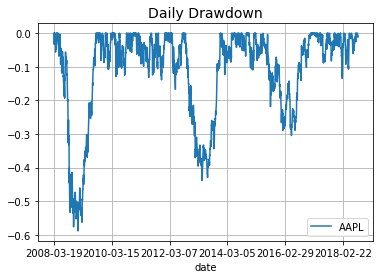

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
daily_drawdown.plot(ax=ax);
ax.set_title("Daily Drawdown", fontsize=14)
plt.legend(loc="best");
plt.grid(True)
plt.show()

fig.savefig('results/daily_drawdown.png');

In [ ]:
# Using the average daily return to calculate portfolio return

returns = prices_train_df.pct_change() # get the assets daily returns
mean_daily_returns = returns.mean().values

uw_returns = np.dot(mean_daily_returns, uniform_weights)

print("uniform weights portfolio average daily return = {:.4%}".format(uw_returns))

uniform weights portfolio average daily return = 0.0610%


In [ ]:
#Annualized Return, Variance and Standard Deviation

def get_annualized_return(prices, weigths):
    months = (pd.to_datetime(prices_train_df.index)[-1] - pd.to_datetime(prices_train_df.index)[0]) / np.timedelta64(1, 'M')
    months = np.floor(months)
    total_return = (prices.iloc[-1].dot(weigths) - prices.iloc[0].dot(weigths)) / prices.iloc[0].dot(weigths)
    annualized_return = ((1 + total_return) ** (12 / months)) - 1
    return annualized_return


uw_annual_return = get_annualized_return(prices_train_df, uniform_weights)

def get_portfolio_variance(returns, weigths):
    covariance_returns = returns.cov() * 250
    return np.dot(weigths.T, np.dot(covariance_returns, weigths))

uw_var = get_portfolio_variance(returns, uniform_weights)

print("uniform weights portfolio annualized return = {:.4%}".format(uw_annual_return))
print("uniform weights portfolio annualized variance = {:.1%}".format(uw_var))
print("uniform weights portfolio annualized std = {:.1%}".format(np.sqrt(uw_var)))

uniform weights portfolio annualized return = 11.7336%
uniform weights portfolio annualized variance = 3.7%
uniform weights portfolio annualized std = 19.2%


In [ ]:
# Sharpe ratio

uniform_returns = returns.dot(uniform_weights)

rfr = 0.04 #Risk free rate

uw_vol = uniform_returns.std() * np.sqrt(250)

uw_sharpe_ratio = ((uw_annual_return  - rfr) / uw_vol)

print("uniform weights portfolio sharpe ratio = {:.2f}".format(uw_sharpe_ratio))

uniform weights portfolio sharpe ratio = 0.40


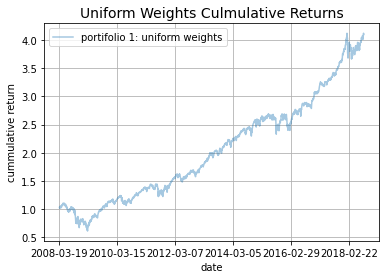

In [ ]:
# Plotting the cummulative return
uniform_cum_returns = (1 + uniform_returns).cumprod()
uniform_cum_returns.name = "portifolio 1: uniform weights"

fig, ax = plt.subplots(figsize=(6,4))
uniform_cum_returns.plot(ax=ax, alpha=0.4);

plt.legend(loc="best");
plt.grid(True)
ax.set_ylabel("cummulative return");
ax.set_title('Uniform Weights Culmulative Returns', fontsize=14)

fig.savefig('results/uniform_weights_portfolio.png');

### 7.4 Maximum Sharpe Portfolio
---
We use PyPortfolioOpt library to get the weights for the Maximum Sharpe Portfolio

In [ ]:
mu = expected_returns.mean_historical_return(prices_train_df)
Sigma = risk_models.sample_cov(prices_train_df)
ef = EfficientFrontier(mu,Sigma)
ef.add_objective(objective_functions.L2_reg, gamma=1)

raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
max_sharpe_portfolio = pd.DataFrame(cleaned_weights, index=[0])

print("max sharpe portfolio:")
show_clean_p(max_sharpe_portfolio)

_ = ef.portfolio_performance(verbose=True, risk_free_rate=rfr)

print()

max sharpe portfolio:


/usr/local/lib/python3.7/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:258: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  "max_sharpe transforms the optimization problem so additional objectives may not work as expected."


,RTX,TRV,DIS,MSFT,MMM,HD,V,WBA,NKE,AXP,AAPL,IBM,KO,XOM,MRK,MCD,INTC,CAT,BA,CSCO,CVX,JPM,PG,VZ,PFE,DD,UNH,WMT,GS,JNJ
0,0.938%,3.235%,4.064%,5.448%,3.399%,10.453%,11.062%,1.207%,7.197%,0.485%,12.555%,0.000%,1.273%,0.000%,1.369%,5.607%,2.210%,0.266%,6.978%,0.244%,0.000%,1.106%,0.000%,2.786%,3.257%,0.347%,8.890%,2.319%,0.000%,3.307%


Expected annual return: 18.9%
Annual volatility: 19.2%
Sharpe Ratio: 0.88



/usr/local/lib/python3.7/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  UserWarning,


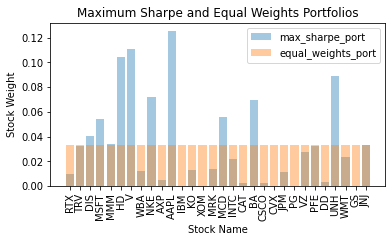

In [ ]:
plt.subplots(figsize=(6,3))
plt.title('Maximum Sharpe and Equal Weights Portfolios')
plt.bar(max_sharpe_portfolio.T.index, max_sharpe_portfolio.T[0], alpha=0.4, label='max_sharpe_port')
plt.bar(uniform_weights_port.T.index, uniform_weights_port.T[0], alpha=0.4, label='equal_weights_port')
plt.xlabel('Stock Name')
plt.ylabel('Stock Weight')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
prices_train_df.head()

,RTX,TRV,DIS,MSFT,MMM,HD,V,WBA,NKE,AXP,AAPL,IBM,KO,XOM,MRK,MCD,INTC,CAT,BA,CSCO,CVX,JPM,PG,VZ,PFE,DD,UNH,WMT,GS,JNJ
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-03-19,31.066071,33.120544,26.503475,21.289875,54.271484,19.065926,12.849033,26.163273,12.993440,33.486904,3.970518,72.884712,19.671188,51.317009,25.033487,36.110928,13.943850,50.003796,54.094528,17.922316,47.751389,30.057051,44.842640,16.877592,11.298723,33.980427,29.698526,37.222588,137.157700,43.434654
2008-03-20,31.179014,34.105396,27.063410,21.706453,53.253948,19.932566,14.634252,26.450939,14.136642,36.660183,4.080751,73.751060,20.025503,51.663467,25.248959,36.622356,14.380213,50.064850,55.088802,18.142044,48.521099,32.534088,45.874271,17.353222,11.287757,34.045757,29.506392,39.018482,147.982697,43.769375
2008-03-24,31.779915,34.034027,27.182180,21.699015,53.704681,20.784990,13.583590,27.767014,14.517013,37.800327,4.272435,74.206055,20.071436,52.240879,25.767214,37.530846,14.631454,51.563667,56.186127,18.779243,48.987606,32.944557,46.271038,17.761595,11.298723,35.147011,29.832195,39.311680,147.364838,43.441345
2008-03-25,31.698612,34.083973,27.216114,21.676701,53.936882,20.429815,14.384096,27.335508,14.367810,37.880047,4.316834,73.526703,20.146891,51.785015,26.011787,37.820225,14.724012,51.977360,55.898926,18.859810,49.296661,32.597771,45.986687,17.727962,11.391920,35.333679,29.472973,38.886536,147.982697,43.213722
2008-03-26,31.450113,33.934113,26.944635,21.245239,53.718315,20.003599,14.545564,27.299547,13.926496,36.165859,4.441764,72.866043,20.061598,52.429291,26.029245,37.416462,14.452935,52.465675,56.193504,18.149361,49.541557,31.217722,46.052811,17.362829,11.342580,35.287006,28.487194,38.776588,144.563843,43.314144


### 7.5 Store the Data Frames

In [ ]:
%store max_sharpe_portfolio
%store uniform_weights_port

%store prices_train_df
%store prices_test_df

Stored 'max_sharpe_portfolio' (DataFrame)
Stored 'uniform_weights_port' (DataFrame)
Stored 'prices_train_df' (DataFrame)
Stored 'prices_test_df' (DataFrame)


# Asset Portfolio Management using Deep Reinforcement Learning
---

## 8.0 Deep Reinforcement Learning Portfolios

### 8.1 Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
matplotlib.use('Agg')
import datetime

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import objective_functions
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
# Imports from the FinRL Library

#from config import config
#from backtest import BackTestStats, BaselineStats, BackTestPlot, backtest_strat, baseline_strat
#from backtest import backtest_strat, baseline_strat

In [ ]:
!pip install finrl==0.0.3

  Attempting uninstall: finrl
    Found existing installation: finrl 0.3.3
    Uninstalling finrl-0.3.3:
      Successfully uninstalled finrl-0.3.3


In [ ]:
import pandas as pd
import numpy as np

from pyfolio import timeseries
import pyfolio
import matplotlib.pyplot as plt

from finrl.marketdata.yahoodownloader import YahooDownloader
from finrl.config import config


def BackTestStats(account_value):
    df = account_value.copy()
    df = get_daily_return(df)
    DRL_strat = backtest_strat(df)
    perf_func = timeseries.perf_stats
    perf_stats_all = perf_func(
        returns=DRL_strat,
        factor_returns=DRL_strat,
        positions=None,
        transactions=None,
        turnover_denom="AGB",
    )
    print(perf_stats_all)
    return perf_stats_all


def BaselineStats(
    baseline_ticker="^DJI",
    baseline_start=config.START_TRADE_DATE,
    baseline_end=config.END_DATE,
):

    dji, dow_strat = baseline_strat(
        ticker=baseline_ticker, start=baseline_start, end=baseline_end
    )
    perf_func = timeseries.perf_stats
    perf_stats_all = perf_func(
        returns=dow_strat,
        factor_returns=dow_strat,
        positions=None,
        transactions=None,
        turnover_denom="AGB",
    )
    print(perf_stats_all)
    return perf_stats_all


def BackTestPlot(
    account_value,
    baseline_start=config.START_TRADE_DATE,
    baseline_end=config.END_DATE,
    baseline_ticker="^DJI",
):

    df = account_value.copy()
    df = get_daily_return(df)

    dji, dow_strat = baseline_strat(
        ticker=baseline_ticker, start=baseline_start, end=baseline_end
    )
    df["date"] = dji["date"]
    df = df.dropna()

    DRL_strat = backtest_strat(df)

    with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_full_tear_sheet(
            returns=DRL_strat, benchmark_rets=dow_strat, set_context=False
        )


def backtest_strat(df):
    strategy_ret = df.copy()
    strategy_ret["date"] = pd.to_datetime(strategy_ret["date"])
    strategy_ret.set_index("date", drop=False, inplace=True)
    strategy_ret.index = strategy_ret.index.tz_localize("UTC")
    del strategy_ret["date"]
    ts = pd.Series(strategy_ret["daily_return"].values, index=strategy_ret.index)
    return ts


def baseline_strat(ticker, start, end):
    dji = YahooDownloader(
        start_date=start, end_date=end, ticker_list=[ticker]
    ).fetch_data()
    dji["daily_return"] = dji["close"].pct_change(1)
    dow_strat = backtest_strat(dji)
    return dji, dow_strat


def get_daily_return(df):
    df["daily_return"] = df.account_value.pct_change(1)
    # df=df.dropna()
    sharpe = (252 ** 0.5) * df["daily_return"].mean() / df["daily_return"].std()

    annual_return = ((df["daily_return"].mean() + 1) ** 252 - 1) * 100
    print("annual return: ", annual_return)
    print("sharpe ratio: ", sharpe)
    return df

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


### 8.2 Load Data

In [ ]:
%store -r train_df
%store -r test_df

In [ ]:
tech_indicator_list = ['f01','f02','f03','f04']

In [ ]:
train_df.head()

,date,tic,close,high,low,open,volume,cov_list,f01,f02,f03,f04
0,2009-03-20,AAPL,3.110704,3.682500,3.591786,3.646071,695587200.0,"[[0.0013155167709794993, 0.0007396899865970468...",0.980409,0.622131,4.136142,3.71955
0,2009-03-20,CVX,38.960262,67.980003,64.269997,67.540001,23811700.0,"[[0.0013155167709794993, 0.0007396899865970468...",0.980409,0.622131,4.136142,3.71955
0,2009-03-20,DIS,15.026185,17.980000,17.080000,17.799999,17766600.0,"[[0.0013155167709794993, 0.0007396899865970468...",0.980409,0.622131,4.136142,3.71955
0,2009-03-20,HD,16.379534,22.730000,21.760000,22.590000,22361800.0,"[[0.0013155167709794993, 0.0007396899865970468...",0.980409,0.622131,4.136142,3.71955
0,2009-03-20,IBM,58.762367,90.822182,88.126198,89.063095,12754819.0,"[[0.0013155167709794993, 0.0007396899865970468...",0.980409,0.622131,4.136142,3.71955


### 8.4 Implement DRL Algorithms

In [ ]:
import numpy as np
import pandas as pd
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv


class StockPortfolioEnv(gym.Env):
    """A single stock trading environment for OpenAI gym
    Attributes
    ----------
        df: DataFrame
            input data
        stock_dim : int
            number of unique stocks
        hmax : int
            maximum number of shares to trade
        initial_amount : int
            start money
        transaction_cost_pct: float
            transaction cost percentage per trade
        reward_scaling: float
            scaling factor for reward, good for training
        state_space: int
            the dimension of input features
        action_space: int
            equals stock dimension
        tech_indicator_list: list
            a list of technical indicator names
        turbulence_threshold: int
            a threshold to control risk aversion
        day: int
            an increment number to control date
    Methods
    -------
    _sell_stock()
        perform sell action based on the sign of the action
    _buy_stock()
        perform buy action based on the sign of the action
    step()
        at each step the agent will return actions, then 
        we will calculate the reward, and return the next observation.
    reset()
        reset the environment
    render()
        use render to return other functions
    save_asset_memory()
        return account value at each time step
    save_action_memory()
        return actions/positions at each time step
        
    """
    metadata = {'render.modes': ['human']}

    def __init__(self, 
                df,
                stock_dim,
                hmax,
                initial_amount,
                transaction_cost_pct,
                reward_scaling,
                state_space,
                action_space,
                tech_indicator_list,
                initial_weights,
                turbulence_threshold=None,
                lookback=252,
                day = 0):
        #super(StockEnv, self).__init__()
        #money = 10 , scope = 1
        self.day = day
        self.lookback=lookback
        self.df = df
        self.stock_dim = stock_dim
        self.hmax = hmax
        self.initial_amount = initial_amount
        self.transaction_cost_pct =transaction_cost_pct
        self.reward_scaling = reward_scaling
        self.state_space = state_space
        self.action_space = action_space
        self.tech_indicator_list = tech_indicator_list
        self.initial_weights = initial_weights

        # action_space normalization and shape is self.stock_dim
        self.action_space = spaces.Box(low = 0, high = 1,shape = (self.action_space,)) 
 
        # covariance matrix + technical indicators
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape = (self.state_space+len(self.tech_indicator_list),self.state_space))

        # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.terminal = False     
        self.turbulence_threshold = turbulence_threshold        
        # initalize state: inital portfolio return + individual stock return + individual weights
        self.portfolio_value = self.initial_amount
    
        # memorize portfolio value each step
        self.asset_memory = [self.initial_amount]
        # memorize portfolio return each step
        self.portfolio_return_memory = [0]
        self.actions_memory=[self.initial_weights]
        self.date_memory=[self.data.date.unique()[0]]
             
    def step(self, actions):
        # print(self.day)
        self.terminal = self.day >= len(self.df.index.unique())-1
        # print(actions)

        if self.terminal:
            df = pd.DataFrame(self.portfolio_return_memory)
            df.columns = ['daily_return']
            plt.plot(df.daily_return.cumsum(),'r')
            plt.savefig('results/cumulative_reward.png')
            plt.close()
            
            plt.plot(self.portfolio_return_memory,'r')
            plt.savefig('results/rewards.png')
            plt.close()

            print("=================================")
            print("begin_total_asset:{}".format(self.asset_memory[0]))           
            print("end_total_asset:{}".format(self.portfolio_value))

            df_daily_return = pd.DataFrame(self.portfolio_return_memory)
            df_daily_return.columns = ['daily_return']
            if df_daily_return['daily_return'].std() !=0:
              sharpe = (252**0.5)*df_daily_return['daily_return'].mean()/ \
                       df_daily_return['daily_return'].std()
              print("Sharpe: ",sharpe)
            print("=================================")
            
            return self.state, self.reward, self.terminal,{}

        else:
            #print("Model actions: ",actions)
            # actions are the portfolio weight
            # normalize to sum of 1
            #if (np.array(actions) - np.array(actions).min()).sum() != 0:
            #  norm_actions = (np.array(actions) - np.array(actions).min()) / (np.array(actions) - np.array(actions).min()).sum()
            #else:
            
      
            #  norm_actions = actions
            weights = self.softmax_normalization(actions) 
            #print("Normalized actions: ", weights)
            self.actions_memory.append(weights)
            last_day_memory = self.data
            
            
            """
            # Get data frame of close prices 
            # Reset the Index to tic and date
            df_prices = self.data.copy()
            df_prices = df_prices.reset_index().set_index(['tic', 'date']).sort_index()
            tic_list = list(set([i for i,j in df_prices.index]))
            # Get all the Close Prices
            df_close = pd.DataFrame()
            for ticker in tic_list:
                series = df_prices.xs(ticker).close
                df_close[ticker] = series
            
            mu = expected_returns.mean_historical_return(df_close)
            Sigma = risk_models.sample_cov(df_close)
            ef = EfficientFrontier(mu,Sigma)
            raw_weights = ef.max_sharpe()
            weights = [j for i,j in raw_weights.items()]
            self.actions_memory.append(weights)
            last_day_memory = self.data
            
            """

            #load next state
            self.day += 1
            self.data = self.df.loc[self.day,:]
            self.covs = self.data['cov_list'].values[0]
            self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
            #print(self.state)
            # calcualte portfolio return
            # individual stocks' return * weight
            portfolio_return = sum(((self.data.close.values / last_day_memory.close.values)-1)*weights)
            # update portfolio value
            new_portfolio_value = self.portfolio_value*(1+portfolio_return)
            self.portfolio_value = new_portfolio_value

            # save into memory
            self.portfolio_return_memory.append(portfolio_return)
            self.date_memory.append(self.data.date.unique()[0])            
            self.asset_memory.append(new_portfolio_value)

            # the reward is the new portfolio value or end portfolo value
            self.reward = new_portfolio_value 
            #print("Step reward: ", self.reward)
            #self.reward = self.reward*self.reward_scaling

        return self.state, self.reward, self.terminal, {}

    def reset(self):
        self.asset_memory = [self.initial_amount]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        # load states
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.portfolio_value = self.initial_amount
        #self.cost = 0
        #self.trades = 0
        self.terminal = False 
        self.portfolio_return_memory = [0]
              
        self.actions_memory=[self.initial_weights] 
        self.date_memory=[self.data.date.unique()[0]] 
        return self.state
    
    def render(self, mode='human'):
        return self.state
        
    def softmax_normalization(self, actions):
        numerator = np.exp(actions)
        denominator = np.sum(np.exp(actions))
        softmax_output = numerator/denominator
        return softmax_output

    
    def save_asset_memory(self):
        date_list = self.date_memory
        portfolio_return = self.portfolio_return_memory
        #print(len(date_list))
        #print(len(asset_list))
        df_account_value = pd.DataFrame({'date':date_list,'daily_return':portfolio_return})
        return df_account_value

    def save_action_memory(self):
        # date and close price length must match actions length
        date_list = self.date_memory
        df_date = pd.DataFrame(date_list)
        df_date.columns = ['date']
        
        action_list = self.actions_memory
        df_actions = pd.DataFrame(action_list)
        df_actions.columns = self.data.tic.values
        df_actions.index = df_date.date
        #df_actions = pd.DataFrame({'date':date_list,'actions':action_list})
        return df_actions
    
    def initial_weights(self, data_frame):
        # Get data frame of close prices 
        # Reset the Index to tic and date
        df_prices = data_frame.copy()
        df_prices = df_prices.reset_index().set_index(['tic', 'date']).sort_index()
        tic_list = list(set([i for i,j in df_prices.index]))
        
        # Get all the Close Prices
        df_close = pd.DataFrame()
        for ticker in tic_list:
            series = df_prices.xs(ticker).close
            df_close[ticker] = series
            
        mu = expected_returns.mean_historical_return(df_close)
        Sigma = risk_models.sample_cov(df_close)
        ef = EfficientFrontier(mu,Sigma, weight_bounds=(0.01, 1))
        
        raw_weights = ef.max_sharpe()
        initial_weights = [j for i,j in raw_weights.items()]
        
        return initial_weights

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def get_sb_env(self):
        e = DummyVecEnv([lambda: self])
        obs = e.reset()
        return e, obs

In [ ]:
# common library
import pandas as pd
import numpy as np
import time
import gym

# RL models from stable-baselines
# from stable_baselines import SAC
# from stable_baselines import TD3

from stable_baselines3.ppo import MlpPolicy
from stable_baselines3.common.vec_env import DummyVecEnv

from stable_baselines3 import DDPG
from stable_baselines3.common.noise import (
    NormalActionNoise,
    OrnsteinUhlenbeckActionNoise,
)

from finrl.config import config

from stable_baselines3 import A2C
from stable_baselines3 import PPO
from stable_baselines3 import TD3
from stable_baselines3.td3.policies import MlpPolicy
from stable_baselines3.common.noise import (
    NormalActionNoise,
    OrnsteinUhlenbeckActionNoise,
)

from stable_baselines3 import SAC


MODELS = {"a2c": A2C, "ddpg": DDPG, "td3": TD3, "sac": SAC, "ppo": PPO}

MODEL_KWARGS = {x: config.__dict__[f"{x.upper()}_PARAMS"] for x in MODELS.keys()}

NOISE = {
    "normal": NormalActionNoise,
    "ornstein_uhlenbeck": OrnsteinUhlenbeckActionNoise,
}


class DRLAgent:
    """Provides implementations for DRL algorithms
    Attributes
    ----------
        env: gym environment class
            user-defined class
    Methods
    -------
    train_PPO()
        the implementation for PPO algorithm
    train_A2C()
        the implementation for A2C algorithm
    train_DDPG()
        the implementation for DDPG algorithm
    train_TD3()
        the implementation for TD3 algorithm
    train_SAC()
        the implementation for SAC algorithm
    DRL_prediction()
        make a prediction in a test dataset and get results
    """

    @staticmethod
    def DRL_prediction(model, test_data, test_env, test_obs):
        """make a prediction"""
        start = time.time()
        account_memory = []
        actions_memory = []
        for i in range(len(test_data.index.unique())):
            action, _states = model.predict(test_obs)
            test_obs, rewards, dones, info = test_env.step(action)
            if i == (len(test_data.index.unique()) - 2):
                account_memory = test_env.env_method(method_name="save_asset_memory")
                actions_memory = test_env.env_method(method_name="save_action_memory")
        end = time.time()
        return account_memory[0], actions_memory[0]

    def __init__(self, env):
        self.env = env

    def get_model(
        self,
        model_name,
        policy="MlpPolicy",
        policy_kwargs=None,
        model_kwargs=None,
        verbose=1,
    ):
        if model_name not in MODELS:
            raise NotImplementedError("NotImplementedError")

        if model_kwargs is None:
            model_kwargs = MODEL_KWARGS[model_name]

        if "action_noise" in model_kwargs:
            n_actions = self.env.action_space.shape[-1]
            model_kwargs["action_noise"] = NOISE[model_kwargs["action_noise"]](
                mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions)
            )
        print(model_kwargs)
        model = MODELS[model_name](
            policy=policy,
            env=self.env,
            tensorboard_log=f"{config.TENSORBOARD_LOG_DIR}/{model_name}",
            verbose=verbose,
            policy_kwargs=policy_kwargs,
            **model_kwargs,
        )
        return model

    def train_model(self, model, tb_log_name, total_timesteps=5000):
        model = model.learn(total_timesteps=total_timesteps, tb_log_name=tb_log_name)
        return model

In [ ]:
#import env_portfolio
#from env_portfolio import StockPortfolioEnv

#import models
#from models import DRLAgent

In [ ]:
stock_dimension = len(train_df.tic.unique())
state_space = stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 20, State Space: 20


In [ ]:
weights_initial = [1/stock_dimension]*stock_dimension

In [ ]:
env_kwargs = {
    "hmax": 500, 
    "initial_amount": 1000000, 
    "transaction_cost_pct": 0.001, 
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": tech_indicator_list, 
    "action_space": stock_dimension, 
    "reward_scaling": 0,
    'initial_weights': [1/stock_dimension]*stock_dimension
}

In [ ]:
e_train_gym = StockPortfolioEnv(df = train_df, **env_kwargs)

In [ ]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


#### 8.4.1 Model 1: A2C

In [ ]:
# initialize
agent = DRLAgent(env = env_train)

A2C_PARAMS = {"n_steps": 5, "ent_coef": 0.005, "learning_rate": 0.0002}
model_a2c = agent.get_model(model_name="a2c",model_kwargs = A2C_PARAMS)

{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0002}
Using cpu device


In [ ]:
trained_a2c = agent.train_model(model=model_a2c, 
                                tb_log_name='a2c',
                                total_timesteps=50000)

Logging to tensorboard_log/a2c/a2c_1
------------------------------------
| time/                 |          |
|    fps                | 279      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -28.3    |
|    explained_variance | 0        |
|    learning_rate      | 0.0002   |
|    n_updates          | 99       |
|    policy_loss        | 1.45e+08 |
|    std                | 0.998    |
|    value_loss         | 3.14e+13 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 313      |
|    iterations         | 200      |
|    time_elapsed       | 3        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -28.3    |
|    explained_variance | 2.38e-07 |
|    learning_rate      | 0.0002   |
|    n_updates          | 199      |
|

In [ ]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.005,
    "learning_rate": 0.0001,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

{'n_steps': 2048, 'ent_coef': 0.005, 'learning_rate': 0.0001, 'batch_size': 128}
Using cpu device


In [ ]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=50000)

Logging to tensorboard_log/ppo/ppo_1
-----------------------------
| time/              |      |
|    fps             | 504  |
|    iterations      | 1    |
|    time_elapsed    | 4    |
|    total_timesteps | 2048 |
-----------------------------
begin_total_asset:1000000
end_total_asset:4807391.017602341
Sharpe:  1.3308199299503813
---------------------------------------
| time/                   |           |
|    fps                  | 455       |
|    iterations           | 2         |
|    time_elapsed         | 8         |
|    total_timesteps      | 4096      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -28.4     |
|    explained_variance   | 0         |
|    learning_rate        | 0.0001    |
|    loss                 | 1.01e+15  |
|    n_updates            | 10        |
|    policy_gradient_loss | -2.12e-07 |
|    std                 

#### 8.4.3 Model 3: DDPG

In [ ]:
agent = DRLAgent(env = env_train)
DDPG_PARAMS = {"batch_size": 128, "buffer_size": 50000, "learning_rate": 0.001}


model_ddpg = agent.get_model("ddpg",model_kwargs = DDPG_PARAMS)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device


In [ ]:
trained_ddpg = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=50000)

Logging to tensorboard_log/ddpg/ddpg_1
begin_total_asset:1000000
end_total_asset:4658023.9707661355
Sharpe:  1.3124054779062377
begin_total_asset:1000000
end_total_asset:4969889.671253224
Sharpe:  1.3477686842716718
begin_total_asset:1000000
end_total_asset:4969889.671253224
Sharpe:  1.3477686842716718
begin_total_asset:1000000
end_total_asset:4969889.671253224
Sharpe:  1.3477686842716718
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 35        |
|    time_elapsed    | 267       |
|    total_timesteps | 9496      |
| train/             |           |
|    actor_loss      | -1.02e+08 |
|    critic_loss     | 5.32e+13  |
|    learning_rate   | 0.001     |
|    n_updates       | 7122      |
----------------------------------
begin_total_asset:1000000
end_total_asset:4969889.671253224
Sharpe:  1.3477686842716718
begin_total_asset:1000000
end_total_asset:4969889.671253224
Sharpe:  1.3477686842716718
begin_total_

### 8.5 Fittng Model on Training Data

In [ ]:
# A2C Train Model
e_trade_gym = StockPortfolioEnv(df = train_df, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

a2c_train_daily_return, a2c_train_weights = DRLAgent.DRL_prediction(model=trained_a2c,
                        test_data = train_df,
                        test_env = env_trade,
                        test_obs = obs_trade)

begin_total_asset:1000000
end_total_asset:4771243.792589672
Sharpe:  1.3380851213295804


In [ ]:
# PPO Train Model
e_trade_gym = StockPortfolioEnv(df = train_df, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

ppo_train_daily_return, ppo_train_weights = DRLAgent.DRL_prediction(model=trained_ppo,
                        test_data = train_df,
                        test_env = env_trade,
                        test_obs = obs_trade)

begin_total_asset:1000000
end_total_asset:4480856.491170201
Sharpe:  1.281661213967155


In [ ]:
# DDPG Train Model
e_trade_gym = StockPortfolioEnv(df = train_df, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

ddpg_train_daily_return, ddpg_train_weights = DRLAgent.DRL_prediction(model=trained_ddpg,
                        test_data = train_df,
                        test_env = env_trade,
                        test_obs = obs_trade)

begin_total_asset:1000000
end_total_asset:4969889.671253224
Sharpe:  1.3477686842716718


In [ ]:
# Store the Training Models
%store a2c_train_daily_return
%store ppo_train_daily_return
%store ddpg_train_daily_return

Stored 'a2c_train_daily_return' (DataFrame)
Stored 'ppo_train_daily_return' (DataFrame)
Stored 'ddpg_train_daily_return' (DataFrame)


### 8.6 Trading
Assume that we have $1,000,000 initial capital at 2019-01-01. We use the DDPG model to trade Dow jones 30 stocks.

In [ ]:
test_df.head(3)

,date,tic,close,high,low,open,volume,cov_list,f01,f02,f03,f04
0,2018-08-24,AAPL,52.278404,54.224998,53.777500,54.150002,73905600.0,"[[0.0001829664511202855, 5.008364320116602e-05...",1.652185,1.810458,1.276807,0.463442
0,2018-08-24,CVX,101.845276,119.540001,118.720001,118.900002,4415400.0,"[[0.0001829664511202855, 5.008364320116602e-05...",1.652185,1.810458,1.276807,0.463442
0,2018-08-24,DIS,109.727470,112.699997,111.440002,111.629997,5049000.0,"[[0.0001829664511202855, 5.008364320116602e-05...",1.652185,1.810458,1.276807,0.463442


In [ ]:
# A2C Test Model
e_trade_gym = StockPortfolioEnv(df = test_df, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

a2c_test_daily_return, a2c_test_weights = DRLAgent.DRL_prediction(model=trained_a2c,
                        test_data = test_df,
                        test_env = env_trade,
                        test_obs = obs_trade)

begin_total_asset:1000000
end_total_asset:1340144.4454293782
Sharpe:  0.6575377410588299


In [ ]:
a2c_test_daily_return.head()

,date,daily_return
0,2018-08-24,0.000000
1,2018-08-27,0.003129
2,2018-08-28,0.001416
3,2018-08-29,0.002727
4,2018-08-30,-0.003818


In [ ]:
a2c_test_weights.to_csv('a2c_test_weights.csv')

In [ ]:
a2c_test_weights.head()

,AAPL,CVX,DIS,HD,IBM,INTC,JNJ,KO,MCD,MMM,MRK,MSFT,NKE,PFE,PG,RTX,VZ,WBA,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,
2018-08-24,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
2018-08-27,0.069614,0.032481,0.084772,0.034187,0.032481,0.032481,0.088294,0.088294,0.032481,0.032481,0.061136,0.058017,0.067156,0.063255,0.051768,0.032481,0.037247,0.036410,0.032481,0.032481
2018-08-28,0.083553,0.056150,0.030737,0.030737,0.030737,0.030737,0.052282,0.058106,0.030737,0.030737,0.030737,0.083553,0.040683,0.083553,0.083553,0.030737,0.040910,0.030737,0.083553,0.057467
2018-08-29,0.097211,0.035762,0.043357,0.035762,0.035762,0.035762,0.054223,0.076488,0.035762,0.035762,0.035762,0.035762,0.047592,0.094588,0.097211,0.035762,0.035762,0.060186,0.035762,0.035762
2018-08-30,0.062827,0.032689,0.088859,0.032689,0.032689,0.032689,0.088859,0.088859,0.032689,0.032689,0.032689,0.034772,0.088859,0.032689,0.034404,0.032689,0.088859,0.032689,0.051689,0.045120


In [ ]:
# PPO Test Model
e_trade_gym = StockPortfolioEnv(df = test_df, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

ppo_test_daily_return, ppo_test_weights = DRLAgent.DRL_prediction(model=trained_ppo,
                        test_data = test_df,
                        test_env = env_trade,
                        test_obs = obs_trade)

begin_total_asset:1000000
end_total_asset:1281837.4799064628
Sharpe:  0.5667171559325825


In [ ]:
ppo_test_weights.to_csv('ppo_test_weights')

In [ ]:
# DDPG Test Model
e_trade_gym = StockPortfolioEnv(df = test_df, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

ddpg_test_daily_return, ddpg_test_weights = DRLAgent.DRL_prediction(model=trained_ddpg,
                        test_data = test_df,
                        test_env = env_trade,
                        test_obs = obs_trade)

begin_total_asset:1000000
end_total_asset:1296836.2353827527
Sharpe:  0.5788334875290588


In [ ]:
ddpg_test_weights.to_csv('ddpg_test_weights')

### 8.7 Save the Portfolios

In [ ]:
a2c_test_portfolio = a2c_test_daily_return.copy()
a2c_test_returns = a2c_test_daily_return.copy()

ppo_test_portfolio = ppo_test_daily_return.copy()
ppo_test_returns = ppo_test_daily_return.copy()

ddpg_test_portfolio = ddpg_test_daily_return.copy()
ddpg_test_returns = ddpg_test_daily_return.copy()

In [ ]:
%store a2c_test_portfolio
%store a2c_test_returns 

%store ppo_test_portfolio
%store ppo_test_returns 

%store ddpg_test_portfolio
%store ddpg_test_returns 

Stored 'a2c_test_portfolio' (DataFrame)
Stored 'a2c_test_returns' (DataFrame)
Stored 'ppo_test_portfolio' (DataFrame)
Stored 'ppo_test_returns' (DataFrame)
Stored 'ddpg_test_portfolio' (DataFrame)
Stored 'ddpg_test_returns' (DataFrame)


# Asset Portfolio Management using Deep Reinforcement Learning
---

## 6 Backtesting and Evaluation of the Portfolios

### 6.1 Import Relevant Packages

In [ ]:
import numpy as np 
import pandas as pd 
import pyfolio as pf
from pyfolio import timeseries
import matplotlib.pylab as plt
#from backtest import BackTestStats, BaselineStats, BackTestPlot, backtest_strat, baseline_strat

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 6.2 Load the Train and Test Data for Portfolios

In [ ]:
%store -r max_sharpe_portfolio
%store -r uniform_weights_port

%store -r prices_train_df
%store -r prices_test_df


%store -r a2c_train_daily_return
%store -r ppo_train_daily_return
%store -r ddpg_train_daily_return

%store -r a2c_test_returns 
%store -r ppo_test_returns 
%store -r ddpg_test_returns 

In [ ]:
returns_train = prices_train_df.pct_change() # get the assets daily returns
returns_test = prices_test_df.pct_change()

# get the culmulative returns for each portfolio
uw_weights = uniform_weights_port.values.flatten()
uw_returns = returns_train.dot(uw_weights)
uw_cum_returns = (1 + uw_returns).cumprod()
uw_cum_returns.name = "portfolio 1: uniform weights"

max_sharpe_weights = max_sharpe_portfolio.values.flatten()
max_sharpe_returns = returns_train.dot(max_sharpe_weights)
max_sharpe_cum_returns = (1 + max_sharpe_returns).cumprod()
max_sharpe_cum_returns.name = "portfolio 2: max sharpe"

a2c_train_cum_returns = (1 + a2c_train_daily_return.reset_index(drop=True).set_index(['date'])).cumprod()
a2c_train_cum_returns = a2c_train_cum_returns['daily_return']
a2c_train_cum_returns.name = 'Portfolio 3: a2c Model'

ppo_train_cum_returns = (1 + ppo_train_daily_return.reset_index(drop=True).set_index(['date'])).cumprod()
ppo_train_cum_returns = ppo_train_cum_returns['daily_return']
ppo_train_cum_returns.name = 'Portfolio 4: ppo Model'

ddpg_train_cum_returns = (1 + ddpg_train_daily_return.reset_index(drop=True).set_index(['date'])).cumprod()
ddpg_train_cum_returns = ddpg_train_cum_returns['daily_return']
ddpg_train_cum_returns.name = 'Portfolio 5: ddpg Model'

date_list = list(ddpg_train_cum_returns.index)

max_sharpe_cum_returns = max_sharpe_cum_returns[(max_sharpe_cum_returns.index).isin (date_list)]
uw_cum_returns = uw_cum_returns[(uw_cum_returns.index).isin (date_list)]


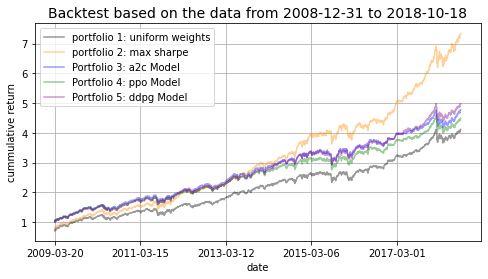

In [ ]:
# Plot the culmulative returns of the portfolios
fig, ax = plt.subplots(figsize=(8,4))
uw_cum_returns.plot(ax=ax, color="black", alpha=0.4);
max_sharpe_cum_returns.plot(ax=ax, color="darkorange", alpha=0.4);

a2c_train_cum_returns.plot(ax=ax, color='blue', alpha=0.4)
ppo_train_cum_returns.plot(ax=ax, color='green', alpha=0.4)
ddpg_train_cum_returns.plot(ax=ax, color='purple', alpha=0.4)

plt.legend(loc="best");
plt.grid(True);
ax.set_ylabel("cummulative return");
ax.set_title("Backtest based on the data from 2008-12-31 to 2018-10-18", fontsize=14);
fig.savefig('results/back_test_on_train_data.png');

### 6.4 Evaluating the Portfolios on Test Data

In [ ]:
# get the culmulative returns for each portfolio
uw_weights = uniform_weights_port.values.flatten()
uw_test_returns = returns_test.dot(uw_weights)
uw_test_cum_returns = (1 + uw_test_returns).cumprod()
uw_test_cum_returns.name = "portfolio 1: uniform weights"

max_sharpe_weights = max_sharpe_portfolio.values.flatten()
max_sharpe_test_returns = returns_test.dot(max_sharpe_weights)
max_sharpe_test_cum_returns = (1 + max_sharpe_test_returns).cumprod()
max_sharpe_test_cum_returns.name = "portfolio 2: max sharpe"

a2c_test_cum_returns = (1 + a2c_test_returns['daily_return']).cumprod()
a2c_test_cum_returns.name = 'Portfolio 3: a2c Model'

ppo_test_cum_returns = (1 + ppo_test_returns['daily_return']).cumprod()
ppo_test_cum_returns.name = 'Portfolio 4: ppo Model'

ddpg_test_cum_returns = (1 + ddpg_test_returns['daily_return']).cumprod()
ddpg_test_cum_returns.name = 'Portfolio 5: ddpg Model'

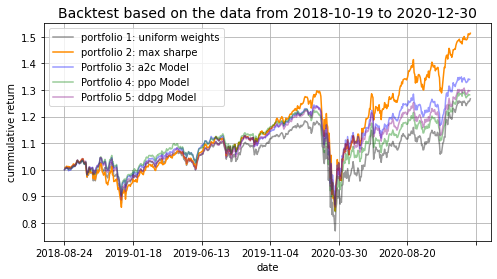

In [ ]:
# Plot the culmulative returns of the portfolios
fig, ax = plt.subplots(figsize=(8,4))
uw_test_cum_returns.plot(ax=ax, color="black", alpha=.4);
max_sharpe_test_cum_returns.plot(ax=ax, color="darkorange");
a2c_test_cum_returns.plot(ax=ax, color='blue', alpha=.4)
ppo_test_cum_returns.plot(ax=ax, color='green', alpha=.4)
ddpg_test_cum_returns.plot(ax=ax, color='purple', alpha=.4)
plt.legend(loc="best");
plt.grid(True);
ax.set_ylabel("cummulative return");
ax.set_title("Backtest based on the data from 2018-10-19 to 2020-12-30", fontsize=14);
fig.savefig('results/back_test_on_test_data.png');

### 6.5 Get the Portfolio Statistics

In [ ]:
# Define a Function for Getting the Portfolio Statistics

def portfolio_stats(portfolio_returns):
    # Pass the returns into a dataframe
    port_rets_df = pd.DataFrame(portfolio_returns)
    port_rets_df = port_rets_df.reset_index()
    port_rets_df.columns = ['date','daily_return']
    
    #Use the FinRL Library to get the Portfolio Returns
    #This makes use of the Pyfolio Library
    
    DRL_strat = backtest_strat(port_rets_df)
    perf_func = timeseries.perf_stats 
    perf_stats_all = perf_func( returns=DRL_strat, 
                                  factor_returns=DRL_strat, 
                                    positions=None, transactions=None, turnover_denom="AGB")
    perf_stats_all = pd.DataFrame( perf_stats_all)
    perf_stats_all.columns = ['Statistic']
    return perf_stats_all

In [ ]:
uw_test_returns.shape

(593,)

In [ ]:
# Get the Portfolio Statistics for all the portfolios
portfolios_returns_dict = {'uniform_weights':uw_test_returns, 'maximum_sharpe':max_sharpe_test_returns,
                          'a2c Model': a2c_test_returns['daily_return'],
                          'ppo Model': ppo_test_returns['daily_return'],
                          'ddpg Model': ddpg_test_returns['daily_return']}

portfolios_stats = pd.DataFrame()
for i,j in portfolios_returns_dict.items():
    port_stats = portfolio_stats(j)
    portfolios_stats[i] = port_stats['Statistic']

In [ ]:
portfolios_stats

,uniform_weights,maximum_sharpe,a2c Model,ppo Model,ddpg Model
Annual return,0.105786,0.192664,0.132727,0.111481,0.116998
Cumulative returns,0.266969,0.513771,0.340144,0.281837,0.296836
Annual volatility,0.260248,0.268582,0.229831,0.235661,0.241855
Sharpe ratio,0.517581,0.792533,0.657538,0.566717,0.578833
Calmar ratio,0.302289,0.552061,0.439144,0.354536,0.381572
Stability,0.291490,0.742925,0.682281,0.436473,0.619186
Max drawdown,-0.349952,-0.348990,-0.302241,-0.314441,-0.306622
Omega ratio,1.116673,1.187206,1.149385,1.126721,1.130184
Sortino ratio,0.727605,1.105307,0.929037,0.797039,0.812340
Skew,NaN,NaN,-0.280659,-0.317431,-0.301580


### 6.6 Benchmarking the Best Portfolio against the Benchmark Index

In [ ]:
#a2c_test_returns = a2c_test_returns.set_index('date')
ppo_test_returns = ppo_test_returns.set_index('date')
ddpg_test_returns = ddpg_test_returns.set_index('date')

In [ ]:
a2c_test_returns.head()

,date,daily_return
0,2018-08-24,0.000000
1,2018-08-27,0.003129
2,2018-08-28,0.001416
3,2018-08-29,0.002727
4,2018-08-30,-0.003818


In [ ]:
# Getting the best performing portfolio

ps_cum = [a2c_test_cum_returns, ppo_test_cum_returns,ddpg_test_cum_returns]
ps = [a2c_test_returns['daily_return'], ppo_test_returns['daily_return'], ddpg_test_returns['daily_return']]

final_return = []
for p in ps_cum:
    final_return.append(p.iloc[-1])
    
id_ = np.argmax(final_return)
best_p = ps[id_]
best_p.name = (ps_cum[id_]).name 

print("Best portfolio: ",  best_p.name)
print("Final cumulative return: {:.2f} ".format(final_return[id_]))

Best portfolio:  Portfolio 3: a2c Model
Final cumulative return: 1.34 


In [ ]:
# convert the best portfolio into a Dataframe

best_p = pd.DataFrame(best_p)
best_p = best_p.reset_index()
best_p.columns=['date','daily_return']
best_p['date'] = a2c_test_returns['date']

In [ ]:
best_p.head()

,date,daily_return
0,2018-08-24,0.000000
1,2018-08-27,0.003129
2,2018-08-28,0.001416
3,2018-08-29,0.002727
4,2018-08-30,-0.003818


In [ ]:
# Best portfolio stats
best_port_strat = backtest_strat(best_p)
perf_func = timeseries.perf_stats 
perf_stats_all = perf_func( returns=best_port_strat, 
                              factor_returns=best_port_strat, 
                                positions=None, transactions=None, turnover_denom="AGB")

In [ ]:
prices_test_dates = list(prices_test_df.index)

print("==============Get Index Stats===========")
baesline_perf_stats=BaselineStats('^DJI',
                                  baseline_start = prices_test_dates[0],
                                  baseline_end = prices_test_dates[-1])

==============Get Index Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (592, 7)
Annual return          0.072651
Cumulative returns     0.179106
Annual volatility      0.265712
Sharpe ratio           0.398135
Calmar ratio           0.195897
Stability              0.151441
Max drawdown          -0.370862
Omega ratio            1.089430
Sortino ratio          0.546816
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.860912
Daily value at risk   -0.033057
Alpha                  0.000000
Beta                   1.000000
dtype: float64


In [ ]:
dji, dow_strat = baseline_strat('^DJI',prices_test_dates[1], prices_test_dates[-1])

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (591, 7)


In [ ]:
# Get the Benchmarking Plots
import pyfolio
%matplotlib inline
with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_full_tear_sheet(returns = best_port_strat,
                                       benchmark_rets=dow_strat, set_context=False)